# Initailize

In [48]:
import pandas as pd
import numpy as np
import os
import timeit
from sklearn.model_selection import train_test_split

#Loading train_normalize.csv Data
path = '/home/chiweilo/Desktop/Project/Second/normalizingData/'
path2 = '/home/chiweilo/Desktop/Project/Second/model/'
if not os.path.exists(path2):
    os.makedirs(path2)

# Model Trainning

In [49]:
normalizeTrainningData = pd.read_csv(path+'train_normalize.csv',encoding = 'utf8')
#normalizeTrainningData.drop(normalizeTrainningData.columns[12:56],axis=1,inplace=True)
#extractTrainningData.drop(columns = "d_time",inplace=True)
print (normalizeTrainningData.shape)
print (normalizeTrainningData.head())
print (normalizeTrainningData.columns)

(453336, 123)
   Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday    d_time  \
0       0        0          0         0       0         1       0  0.465716   
1       0        0          0         0       0         1       0  0.511146   
2       0        0          0         0       0         1       0  0.994085   
3       0        0          0         0       0         1       0  0.571485   
4       0        0          0         0       0         1       0  0.692590   

        o_x       o_y     ...      p57  p58  p59  p60  p61  p62  p63  p64  \
0  0.609890  0.410596     ...      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.467033  0.284768     ...      0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
2  0.532967  0.278146     ...      0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
3  0.450549  0.403974     ...      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.384615  0.304636     ...      0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   

   p65  click_mode  
0  0.0           1  
1  0.0

In [50]:
normalizeTrainningData['click_mode'] = normalizeTrainningData['click_mode'] - 1
print (normalizeTrainningData.shape)
print (normalizeTrainningData.head())

(453336, 123)
   Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday    d_time  \
0       0        0          0         0       0         1       0  0.465716   
1       0        0          0         0       0         1       0  0.511146   
2       0        0          0         0       0         1       0  0.994085   
3       0        0          0         0       0         1       0  0.571485   
4       0        0          0         0       0         1       0  0.692590   

        o_x       o_y     ...      p57  p58  p59  p60  p61  p62  p63  p64  \
0  0.609890  0.410596     ...      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.467033  0.284768     ...      0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
2  0.532967  0.278146     ...      0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
3  0.450549  0.403974     ...      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.384615  0.304636     ...      0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   

   p65  click_mode  
0  0.0           0  
1  0.0

In [51]:
# X_train, X_test, y_train, y_test = train_test_split(normalizeTrainningData.iloc[:,:-1].values,normalizeTrainningData.iloc[:,-1].values,test_size=0,random_state=42)
# print(X_train.shape)
# print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)


(453336, 122)
(453336,)
(0, 122)
(0,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(normalizeTrainningData.iloc[:,:-1].values,normalizeTrainningData.iloc[:,-1].values,test_size=0.2,random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# XGBoost

In [52]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [53]:
start = timeit.default_timer()

model = xgb.XGBClassifier(max_depth=10)
model.fit(X_train,y_train)

stop = timeit.default_timer()
print('Time Cost: ', stop - start)   
print(model)
# dtrain = xgb.DMatrix(X_train,label=y_train)
# dtest = xgb.DMatrix(X_test,label=y_test)

# param = {'max_depth': 6, 'eta': 0.1, 'objective': 'multi:softprob', 'num_class': 11}
# param['nthread'] = 4
# param['eval_metric'] = 'auc'

# evallist = [(dtrain, 'train'),(dtest, 'test')]

# num_round = 10
# bst = xgb.train(param, dtrain, num_round, evallist)
# #print(bst.predict(dtrain))

Time Cost:  4330.685623136007
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


In [54]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


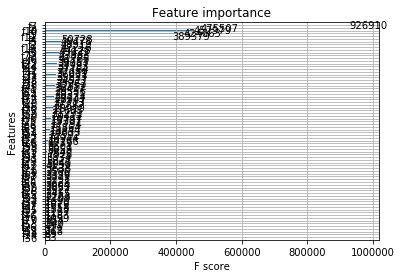

In [14]:
from xgboost import plot_importance
from matplotlib import pyplot
# plot feature importance
plot_importance(model)
pyplot.show()

In [55]:
from sklearn.metrics import accuracy_score

In [56]:
y_pred1 = model.predict(X_train)
predictions1 = [round(value) for value in y_pred1]
trainaccuracy = accuracy_score(y_train, predictions1)
print("TrainAccuracy: %.2f%%" % (trainaccuracy * 100.0))

TrainAccuracy: 78.02%


In [39]:
# make predictions for test data
y_pred2 = model.predict(X_test)
predictions2 = [round(value) for value in y_pred2]
# evaluate predictions
testaccuracy = accuracy_score(y_test, predictions2)
print("TestAccuracy: %.2f%%" % (testaccuracy * 100.0))

TestAccuracy: 71.35%


In [57]:
import pickle

In [58]:
# save model to file
pickle.dump(model, open(path2+"AllFullDepth10.pickle.dat", "wb"))

In [59]:
# load model from file
model2 = pickle.load(open(path2+"AllFullDepth10.pickle.dat", "rb"))

In [43]:
y_pred3 = model2.predict(X_test)
predictions3 = [round(value) for value in y_pred3]
# evaluate predictions
testaccuracy2 = accuracy_score(y_test, predictions3)
print("TestAccuracy: %.2f%%" % (testaccuracy2 * 100.0))

TestAccuracy: 71.35%


# Full Depth=6

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
       
TrainAccuracy: 72.13%

TestAccuracy: 70.89%

# Full Depth=10 Min_Child=6

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
       
TrainAccuracy: 77.31%

TestAccuracy: 71.35%

# Full Depth=10

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
       
TrainAccuracy: 99.53%

TestAccuracy: 71.42%


# Full Depth=20

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=20, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
       
TrainAccuracy: 99.52%

TestAccuracy: 71.36%


# NoPlan Depth=10

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
       
TrainAccuracy: 59.61%

TestAccuracy: 53.84%


# RandomForest

In [124]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

/usr/local/lib/python3.5/dist-packages/scikit_learn-0.20.2-py3.5-linux-x86_64.egg/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1000, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [115]:
print(rfc.feature_importances_)

[1.12747020e-02 9.84381361e-03 1.20526246e-02 1.18884771e-02
 1.28910258e-02 1.20041756e-02 1.15077078e-02 1.70188664e-01
 1.35858624e-01 1.28032236e-01 1.32630159e-01 1.24283611e-01
 4.96590337e-03 8.40559734e-04 5.71024325e-03 3.96368302e-03
 2.84861243e-03 5.07791129e-04 1.15281020e-04 7.12183534e-03
 7.21027896e-03 6.90238839e-03 6.47868114e-03 8.91163236e-04
 1.18073902e-04 3.01453838e-03 3.57418529e-04 9.22648790e-04
 1.31901044e-03 2.11194177e-03 1.52177463e-03 7.63096990e-04
 3.14529014e-04 2.38957389e-03 9.06572739e-04 6.92542399e-04
 4.12063514e-05 1.83019556e-03 4.44517577e-03 5.22569502e-03
 4.77775148e-03 5.72591980e-03 3.50003408e-03 2.90579014e-03
 6.29214448e-03 5.20151115e-03 4.73613431e-03 6.82886026e-03
 5.86703150e-03 6.54750766e-03 6.63090310e-03 5.52076313e-03
 4.37580471e-03 7.76922434e-04 5.73141443e-03 1.46082311e-03
 1.70688130e-03 1.94787572e-03 3.89842062e-03 8.91206021e-03
 1.87862910e-03 3.49883176e-03 2.23950832e-03 1.76804339e-03
 1.39210198e-03 1.779091

In [116]:
ll = rfc.predict(X_train)
for p in ll:
    print(p+1)

2
2
5
5
2
9
2
1
1
2
9
7
7
2
3
5
2
1
2
7
2
2
2
2
2
1
2
9
7
2
1
9
2
2
2
2
9
9
9
7
1
9
1
1
5
7
5
3
1
2
2
5
9
5
5
7
5
2
4
1
5
2
9
2
6
2
2
2
3
9
10
2
4
1
1
2
7
9
10
2
6
10
5
2
5
5
1
2
9
5
2
10
7
2
7
3
2
2
2
2
1
1
1
5
9
1
2
5
2
2
7
5
2
3
2
2
5
4
1
2
1
5
2
9
5
2
1
2
1
2
4
2
10
7
9
1
7
1
5
7
1
5
4
1
7
2
2
2
2
7
7
2
9
2
7
7
2
5
1
2
4
5
9
2
9
1
5
1
9
6
2
2
2
1
5
5
2
1
1
1
7
2
2
3
2
3
7
2
2
7
9
7
7
5
7
4
1
9
2
1
10
7
5
1
7
2
7
2
2
7
9
5
7
1
1
2
7
7
9
7
5
2
7
2
2
2
1
3
1
2
9
6
2
7
7
3
7
2
2
2
2
1
7
7
1
5
7
6
2
9
1
9
2
2
1
7
1
3
2
2
2
2
7
3
3
2
2
2
7
4
1
1
2
9
7
1
7
2
1
1
2
7
10
2
1
5
7
7
5
2
7
1
2
7
5
7
2
1
7
2
9
9
7
2
7
2
7
1
5
2
10
7
9
7
2
5
4
3
6
7
1
1
7
1
3
5
5
2
1
2
1
5
7
2
2
4
9
2
2
5
7
9
2
1
9
2
5
9
5
9
3
7
1
2
9
3
9
1
10
2
2
2
6
5
2
10
9
2
2
7
9
1
1
7
3
5
1
10
2
2
3
1
1
7
2
7
7
2
7
7
11
2
10
4
10
4
2
2
10
5
1
7
4
2
7
1
1
1
1
1
1
7
2
2
2
2
1
1
10
9
7
2
1
7
2
1
9
7
5
7
2
2
7
7
5
5
2
1
4
7
2
2
2
7
7
7
6
1
2
2
9
7
7
3
2
2
7
6
9
9
7
9
5
2
2
1
7
9
5
9
7
7
7
9
3
1
7
9
1
2
7
7
2
2
2
9
1
7
7
2
1
2


7
3
5
9
2
1
1
5
7
9
9
9
1
2
7
7
6
2
2
3
4
10
2
1
1
7
5
7
2
1
2
7
5
2
1
7
2
5
5
10
7
7
10
2
7
3
11
2
2
10
2
2
5
1
10
4
6
5
9
7
9
7
5
9
9
5
1
7
1
2
10
2
7
1
1
4
7
2
7
7
2
2
2
2
6
4
2
5
2
2
9
7
1
7
4
5
5
10
7
9
7
2
7
7
2
5
7
2
2
1
1
9
6
2
2
2
1
8
7
1
5
9
1
9
5
1
7
2
2
3
4
5
7
7
5
3
5
3
10
7
7
7
2
3
1
7
7
9
2
2
1
2
2
2
2
7
7
1
9
9
6
1
5
7
7
9
2
2
2
2
9
1
1
2
7
1
11
2
10
1
2
5
1
6
1
2
3
7
1
7
7
5
2
1
1
5
5
6
5
2
9
9
5
2
2
4
9
2
3
2
4
5
2
1
1
2
6
2
7
1
2
1
9
2
1
2
1
7
2
6
2
2
1
9
10
7
2
6
2
5
10
5
7
2
9
3
5
2
7
9
6
3
4
5
2
2
2
3
4
1
2
3
9
5
4
7
7
9
2
9
2
2
7
2
10
7
2
2
9
3
9
7
1
7
6
1
1
1
2
2
9
2
2
9
2
6
5
2
7
1
2
2
9
5
1
7
1
2
1
2
2
1
2
2
1
2
2
1
1
2
9
2
3
1
2
1
2
2
1
7
10
11
4
4
2
10
2
1
2
10
1
7
7
1
9
9
1
4
9
1
3
2
7
7
9
1
2
2
7
10
1
11
5
9
2
1
2
2
2
1
2
3
6
1
3
7
3
3
5
2
1
2
2
7
7
5
2
5
6
5
2
2
9
11
1
2
2
3
10
9
1
6
2
5
5
9
7
2
1
2
9
1
1
7
9
1
2
5
1
2
5
2
9
1
2
1
7
7
7
1
10
7
2
9
7
7
3
4
7
1
4
7
2
7
2
2
2
1
1
2
7
2
2
1
2
4
2
1
5
10
1
2
9
1
2
1
1
1
2
4
2
1
7
2
7
6
3
2
7
6
7
2
2
4
2
5
1
5


1
7
2
4
11
2
1
9
10
3
5
2
9
3
1
9
9
2
5
5
1
2
2
9
2
2
2
2
7
7
9
9
4
2
3
2
2
2
2
2
3
2
5
2
7
5
7
2
5
9
2
5
2
2
9
5
5
7
5
9
2
7
10
5
10
1
6
7
7
7
5
7
1
1
1
5
2
2
2
9
9
7
7
1
1
5
10
2
7
5
5
2
4
2
5
2
3
9
5
1
2
3
6
9
2
5
1
2
7
9
1
1
2
7
6
1
2
1
2
2
7
2
2
2
5
2
2
5
2
5
2
2
2
2
3
3
9
3
5
1
1
9
9
1
2
7
5
3
9
7
5
5
2
5
1
1
4
2
3
7
2
9
7
9
1
7
2
6
5
1
2
9
7
1
1
7
2
10
5
2
9
2
10
1
3
2
2
7
9
1
9
3
5
2
7
3
5
2
10
2
1
9
7
2
2
5
7
6
2
1
9
9
2
1
2
1
2
9
9
2
5
4
2
1
2
1
1
6
2
9
2
9
9
4
5
2
7
2
2
2
9
10
2
2
2
10
2
3
10
9
7
2
9
5
5
6
2
5
3
5
7
3
1
2
9
2
9
1
2
7
2
2
2
8
2
10
7
2
5
5
7
10
9
7
7
9
2
3
2
1
7
2
5
2
2
7
7
9
5
9
2
1
1
1
9
10
7
7
5
9
1
1
2
1
2
6
5
2
7
7
7
2
2
5
9
7
9
5
5
2
2
2
3
9
3
2
3
1
9
2
7
2
8
10
1
5
7
7
10
2
6
3
1
2
9
7
6
7
2
5
11
9
7
7
5
1
2
9
2
2
2
7
2
7
2
7
5
7
7
7
2
2
9
1
3
7
6
1
7
4
2
7
2
2
2
3
7
6
2
2
1
5
7
2
1
4
1
2
7
7
2
2
4
6
1
2
7
1
1
11
2
5
2
9
1
2
2
7
7
7
7
2
2
2
2
9
4
5
7
7
5
3
5
5
1
7
7
5
2
1
9
2
10
2
3
4
11
3
1
9
2
7
1
1
2
5
7
1
6
2
2
9
3
2
2
2
2
11
2
7
3
5
7
9
2
7
7
1
7
1

10
2
10
4
6
7
1
2
7
1
5
9
1
1
7
11
3
6
2
2
2
5
2
7
2
2
10
10
5
1
2
2
2
1
3
2
7
4
1
7
9
9
2
5
2
1
1
2
2
7
1
1
2
2
2
2
2
1
11
9
9
5
6
1
9
1
2
10
3
2
3
2
9
2
2
5
5
2
3
7
7
10
2
7
5
9
2
3
7
2
9
7
1
7
6
11
7
2
7
2
7
3
2
4
7
1
2
3
10
9
2
2
1
2
2
2
6
9
9
3
9
1
3
1
2
7
1
4
1
1
9
7
2
9
3
1
1
5
2
7
2
7
5
2
2
5
2
2
2
5
3
2
3
2
2
4
7
7
9
2
5
6
2
2
7
7
2
5
2
7
5
3
2
7
1
2
1
2
7
3
7
2
2
2
2
7
2
2
5
7
11
9
2
9
3
7
10
9
2
2
7
7
1
1
9
1
1
2
7
9
10
2
2
2
2
2
1
2
1
7
7
7
7
10
2
1
2
1
1
2
2
6
2
2
2
5
9
5
7
2
2
1
1
5
1
2
4
9
6
2
2
1
10
2
9
7
2
2
5
2
7
9
1
7
7
3
2
3
1
7
3
9
2
1
2
1
7
2
3
4
2
4
9
10
1
5
3
3
1
1
9
1
2
1
3
2
10
7
5
1
3
2
2
10
9
1
2
7
2
1
2
7
7
9
1
7
1
7
2
2
7
2
1
1
1
1
7
5
2
3
7
9
2
2
9
7
2
1
7
7
2
5
2
1
7
7
1
9
2
9
5
9
1
5
2
9
2
5
5
2
1
7
1
4
7
1
7
7
7
5
2
1
2
7
10
7
9
1
2
9
1
3
1
2
9
9
6
7
1
7
9
5
1
7
2
5
7
9
10
9
2
2
9
9
1
4
7
1
1
7
2
1
2
2
5
7
2
2
10
7
5
9
9
2
1
1
5
1
1
7
1
2
5
3
2
2
2
7
2
6
2
2
1
4
2
7
7
2
2
2
1
5
9
2
3
2
2
3
1
2
1
7
1
5
7
7
2
2
5
2
5
10
2
7
7
2
7
2
2
5
2
7
2
7
1
2
2
1
2


7
9
1
2
1
7
3
1
2
2
3
10
4
5
2
10
2
2
7
2
1
3
1
1
7
2
2
7
7
9
1
7
2
7
7
3
2
1
2
7
4
2
4
2
9
5
7
2
7
2
6
7
9
1
1
3
2
2
7
3
1
3
2
7
2
2
7
5
4
7
1
9
2
7
2
1
7
2
1
9
5
7
3
1
5
7
1
1
2
2
9
1
6
7
7
3
2
2
9
2
3
7
7
7
9
10
9
2
5
8
9
9
2
9
7
2
7
7
2
5
2
1
5
9
9
2
1
7
7
7
5
7
7
7
3
2
2
9
2
2
2
9
2
7
4
2
2
2
2
2
2
7
2
7
5
3
2
2
9
4
7
7
7
8
1
2
7
7
2
2
3
2
2
11
2
9
7
1
9
1
2
1
7
7
5
2
2
7
7
3
2
9
7
2
7
5
2
7
9
2
2
2
9
1
1
2
5
5
9
7
5
4
8
7
2
2
9
7
8
7
10
2
2
2
2
7
7
5
9
2
9
2
9
9
3
1
2
2
9
9
2
4
7
1
5
2
1
2
10
2
2
10
5
5
1
1
11
2
1
1
2
9
1
2
6
9
2
1
2
7
2
2
3
4
7
6
7
10
9
2
7
1
7
3
10
1
7
3
6
2
7
2
3
7
2
11
7
11
1
2
3
5
2
2
1
7
6
9
7
7
5
2
5
7
5
2
2
11
1
7
9
9
1
1
2
5
1
3
2
1
2
7
2
2
2
7
10
1
1
7
7
2
2
2
7
9
1
1
2
9
1
2
9
7
8
2
2
2
5
5
1
7
7
1
1
9
8
8
8
3
2
5
10
6
1
5
4
2
2
2
5
1
2
1
1
6
9
2
9
7
7
9
1
2
2
7
2
5
2
2
2
1
3
9
7
1
2
7
2
10
10
9
2
2
2
5
5
2
2
5
3
1
6
7
2
5
4
2
7
7
2
7
1
5
2
6
4
3
5
2
1
2
1
6
5
1
2
7
2
1
5
2
10
9
7
7
2
9
7
9
9
2
7
3
2
5
2
9
3
5
4
7
4
9
3
2
2
2
11
2
1
5
7
4
2
2
9
3
2
7
7

9
1
1
3
8
6
1
7
4
2
2
2
9
1
1
5
7
2
7
3
1
10
1
2
2
2
10
4
3
7
3
1
7
3
1
1
7
9
2
2
1
5
2
2
2
7
2
6
2
5
2
5
9
1
5
2
1
4
3
1
2
2
5
2
1
1
2
5
2
7
2
7
2
1
2
9
2
7
1
5
2
3
2
3
3
2
2
5
3
2
2
3
2
1
11
2
2
9
7
2
7
2
7
2
7
2
9
7
2
2
2
9
9
5
2
2
5
5
7
1
5
4
5
7
9
2
1
2
9
4
2
7
7
2
2
2
2
4
3
3
7
2
6
3
7
7
1
1
1
1
3
7
2
2
2
1
7
1
2
9
2
2
7
7
2
4
2
9
1
3
1
7
9
1
11
1
2
9
6
4
2
6
5
1
5
2
7
7
7
1
2
7
7
2
7
9
2
2
1
2
10
2
2
1
6
2
3
2
7
9
6
1
1
3
2
7
6
2
9
5
7
5
2
2
2
3
2
10
6
9
6
1
2
2
1
1
1
5
1
10
3
2
2
1
2
1
1
9
7
2
5
2
4
9
4
6
2
10
3
1
9
7
9
1
1
2
1
11
2
6
5
2
1
2
5
5
2
2
1
4
7
1
1
11
7
2
6
9
2
2
2
2
10
7
3
4
2
1
2
9
7
2
5
5
1
1
9
4
10
1
1
4
5
1
3
7
5
7
7
7
9
1
1
9
11
7
7
9
7
9
5
7
2
5
9
7
2
1
2
7
1
1
3
5
2
1
7
7
2
2
3
7
2
9
5
6
6
2
2
1
1
1
3
1
1
1
5
9
7
2
11
2
6
2
9
9
7
2
2
1
10
9
7
9
2
3
2
2
1
2
9
1
2
9
1
3
2
2
2
2
5
1
5
1
7
2
9
7
2
2
5
7
3
9
9
9
3
9
7
1
5
2
3
7
9
2
2
7
1
1
3
2
9
7
1
7
2
5
7
6
5
1
2
4
2
5
7
2
9
2
1
7
2
7
5
9
1
1
1
6
2
2
7
10
2
1
7
2
7
7
9
2
10
7
2
11
1
7
8
5
1
5
9
4
6
3
5
5
7
2
1


7
5
2
1
2
2
5
2
2
7
1
9
7
6
6
9
2
5
2
2
5
1
2
1
1
2
2
2
5
2
7
9
9
10
1
6
2
9
2
4
2
2
7
2
5
7
1
2
7
3
5
2
2
5
5
2
2
5
1
5
2
3
2
5
4
7
2
1
3
7
10
7
3
4
9
7
2
9
5
2
9
5
9
5
5
9
7
1
5
2
2
2
2
7
9
2
2
7
7
9
3
2
10
9
9
7
1
8
11
2
9
3
7
2
10
3
7
9
2
10
9
7
7
7
1
6
5
1
2
9
9
7
2
7
9
2
7
7
7
10
3
2
2
7
1
1
1
1
7
6
1
2
9
9
2
7
3
9
5
4
1
2
3
2
5
2
3
2
1
1
2
9
6
6
9
1
2
5
1
9
6
2
1
9
7
9
1
2
2
7
5
2
7
2
1
7
7
5
10
2
2
2
7
5
4
2
2
2
2
2
7
2
3
7
1
5
9
3
3
2
2
2
7
2
9
5
5
2
1
7
6
1
10
6
7
9
2
1
10
1
2
2
7
7
9
1
2
9
7
2
7
1
1
9
5
9
7
1
2
3
7
2
1
2
9
7
1
2
2
1
2
2
2
2
9
2
1
7
9
2
7
1
5
2
2
5
7
2
2
2
7
2
3
1
2
2
7
2
3
2
1
2
10
2
2
1
10
2
5
7
4
1
11
2
5
4
2
2
1
2
11
5
2
1
2
3
9
9
7
9
10
1
5
1
1
6
8
9
2
1
4
8
2
2
1
5
5
3
9
7
1
1
3
2
5
2
3
2
2
9
5
9
2
7
1
2
2
2
5
1
7
5
7
1
2
2
7
2
7
9
1
7
4
7
2
5
2
2
6
2
10
2
7
2
2
3
2
3
7
9
9
5
7
9
7
3
2
7
9
2
2
7
4
3
7
2
7
2
5
5
1
9
7
2
9
9
5
1
7
1
7
3
5
1
5
2
2
7
9
9
10
5
11
1
2
2
5
5
1
2
2
5
1
1
2
2
1
10
7
7
11
2
2
5
7
2
5
1
2
2
2
9
2
2
7
9
2
1
2
9
2
1
2
10
2
2
2
5
2
2

11
7
5
7
2
6
9
7
2
1
2
2
1
2
2
7
2
1
1
3
7
3
1
1
2
3
11
7
1
4
1
2
9
1
2
2
4
5
3
2
9
1
2
7
2
3
2
6
2
2
9
7
9
9
2
2
2
2
7
5
2
2
6
1
1
9
2
2
7
7
2
2
10
2
9
5
2
2
1
5
2
7
9
1
2
1
7
2
7
6
1
9
1
10
2
2
2
5
2
2
1
5
3
6
2
7
1
6
7
1
1
5
2
2
6
8
8
2
5
4
7
3
10
5
7
1
6
7
2
1
2
2
4
4
2
7
4
2
2
2
9
1
7
7
2
5
1
1
7
3
3
2
2
1
1
2
5
5
1
9
5
2
1
1
7
5
5
7
5
2
1
4
2
7
2
2
3
5
7
1
3
1
5
7
7
5
2
7
7
2
2
7
2
7
2
1
7
5
2
2
5
5
5
1
5
2
7
7
4
2
7
7
7
9
3
2
1
7
9
5
2
1
9
7
2
1
1
4
2
7
3
2
2
5
1
11
2
5
9
9
2
2
2
2
3
2
1
2
1
5
2
9
2
1
1
3
7
9
4
2
11
7
9
3
2
2
1
5
2
2
9
7
7
1
10
1
5
4
7
10
7
1
5
2
2
2
2
7
2
9
3
7
7
2
1
9
2
7
7
1
2
10
1
4
2
2
9
7
1
2
3
3
1
7
2
3
7
9
5
7
1
5
2
3
4
7
1
1
3
9
1
9
2
7
3
3
5
1
7
7
7
7
7
2
2
7
5
7
1
9
2
7
1
2
2
8
1
2
1
3
4
8
1
5
9
5
2
8
5
10
2
2
2
2
3
5
6
2
2
7
7
7
7
1
5
7
2
1
7
2
1
2
9
9
2
2
2
5
2
1
2
2
9
1
2
5
7
10
2
2
5
3
1
2
2
7
7
1
5
7
2
6
5
7
3
2
5
2
9
4
7
2
1
2
6
5
5
2
3
5
9
1
2
3
7
7
2
2
2
9
3
1
7
2
10
1
7
9
7
7
1
2
5
1
2
1
7
7
1
6
10
10
2
7
7
3
2
7
7
2
3
7
5
2
1
3
2
3
11
9
3
9


2
9
7
2
2
5
5
7
1
2
9
3
1
2
5
1
5
5
9
1
2
2
10
11
7
5
5
5
9
3
3
2
3
9
5
3
1
2
2
2
6
7
9
2
10
2
5
7
2
9
3
3
1
10
2
2
9
1
5
7
2
3
1
7
7
2
2
5
7
2
9
1
2
9
7
2
7
9
7
2
7
2
2
1
1
5
7
7
3
7
9
2
2
2
2
6
2
2
5
5
1
9
1
1
9
9
2
2
1
2
9
2
7
2
9
2
10
7
7
5
1
4
9
2
7
1
2
2
7
7
1
4
7
6
1
5
2
7
1
2
4
5
1
11
2
2
7
7
7
1
5
2
9
8
9
9
7
1
3
2
2
5
7
2
1
9
7
1
1
1
2
2
7
5
2
9
7
7
7
1
7
9
9
2
5
5
9
1
5
2
9
7
5
9
1
1
7
11
2
2
1
2
7
1
1
7
9
1
7
2
2
9
1
7
2
2
7
7
5
2
7
4
9
2
9
2
1
6
1
9
7
7
2
7
1
2
1
2
7
1
2
1
1
9
2
2
9
2
5
7
9
4
9
2
9
4
2
6
1
2
3
2
7
9
5
2
2
2
7
5
9
4
2
2
1
2
5
3
5
9
2
9
5
2
3
3
2
2
2
2
7
6
4
7
2
2
2
2
10
2
3
2
9
2
9
7
5
1
2
1
2
1
2
2
3
5
5
1
9
2
2
1
9
2
6
1
2
4
2
3
2
2
5
2
9
7
9
2
7
9
7
2
10
5
2
9
9
7
9
3
9
1
2
7
9
10
2
2
10
9
9
5
1
7
1
2
9
11
7
2
10
7
7
10
4
7
1
9
2
2
7
1
9
7
2
2
2
1
1
1
2
2
7
7
6
1
7
1
2
6
7
2
10
2
2
5
9
1
2
7
2
7
2
5
10
1
2
5
7
5
7
2
2
1
4
7
9
7
10
9
6
9
4
2
9
7
5
1
5
2
7
3
5
6
1
5
1
2
2
4
2
7
6
6
5
9
2
5
9
6
2
7
2
5
1
9
1
1
2
1
5
1
5
2
7
7
7
2
9
10
2
2
6
7
1
1
10
1
2
2
5

7
9
1
2
9
1
2
2
2
3
2
1
2
2
5
1
2
2
1
1
2
5
7
2
2
5
5
2
9
7
2
7
2
5
2
6
6
7
2
3
2
1
9
5
1
10
2
2
2
9
5
2
2
1
1
7
7
2
5
2
1
10
1
1
5
7
1
2
1
9
1
2
5
11
9
1
7
2
1
7
2
9
9
7
4
9
10
7
1
1
2
2
2
1
11
9
7
3
2
2
2
7
2
7
1
1
5
5
2
1
2
2
5
3
1
7
2
7
1
5
2
7
7
5
3
2
7
2
7
9
7
2
9
2
7
2
2
1
3
6
9
9
2
2
5
5
2
2
5
7
7
9
5
2
5
8
5
5
1
1
11
1
2
10
1
5
1
1
2
5
5
10
3
2
5
7
10
2
9
2
5
2
9
3
5
2
7
1
5
7
2
2
7
5
2
1
2
7
2
2
7
2
9
2
2
1
9
9
2
10
7
7
2
7
2
7
1
2
1
7
3
1
1
2
2
1
2
7
2
6
7
2
9
2
2
10
9
3
1
2
2
10
5
1
6
2
5
9
2
4
1
11
6
9
1
5
2
2
2
1
5
5
7
5
2
2
9
2
2
2
6
5
2
9
2
1
5
2
1
1
7
2
2
7
4
10
7
2
1
9
2
10
7
1
7
10
5
1
9
1
3
3
6
4
7
7
4
9
7
9
9
1
2
2
7
2
2
2
7
9
7
2
9
2
3
6
3
10
7
7
1
2
3
2
9
6
8
2
7
9
2
3
2
2
7
7
1
9
3
9
2
1
5
2
9
2
2
3
7
9
1
2
2
7
3
6
9
10
9
2
6
7
9
1
4
1
5
1
2
7
2
2
2
3
5
7
3
2
6
5
9
3
2
3
3
3
9
5
1
1
1
2
2
7
2
7
5
5
7
2
7
5
9
10
3
1
2
7
7
6
9
1
9
7
7
5
7
6
5
2
7
6
3
1
2
1
9
1
7
2
7
2
3
5
2
5
7
1
7
2
9
2
2
7
1
2
2
2
7
2
6
9
1
7
2
1
7
6
10
2
2
1
2
1
7
2
1
9
5
9
7
5
2
10
2
5
2
10
6


2
2
2
7
9
5
7
1
7
5
5
2
2
7
11
9
2
7
2
10
2
2
1
1
7
2
7
2
1
2
2
9
7
2
2
2
9
7
2
5
1
1
2
3
2
7
7
6
4
2
9
2
1
7
7
9
7
5
2
5
10
7
2
9
5
9
2
1
2
7
2
2
1
5
1
10
1
4
7
7
2
2
5
7
7
9
5
1
5
2
2
2
2
9
2
5
9
2
5
2
2
1
2
9
1
4
2
2
1
6
1
3
9
7
5
2
5
7
1
3
4
2
1
2
4
10
7
2
2
1
2
2
7
5
2
2
1
4
9
3
7
1
2
2
2
3
2
7
2
7
7
2
11
2
9
2
5
4
7
2
2
9
2
9
2
1
9
6
3
9
1
1
6
1
1
2
3
2
7
2
5
3
2
2
2
2
10
2
7
5
5
9
9
7
3
2
9
2
2
5
7
5
5
1
9
2
10
1
2
4
1
7
1
11
2
2
2
5
7
9
1
2
9
1
1
3
5
7
2
6
2
2
7
1
2
11
2
9
7
2
7
7
9
9
7
4
3
1
7
1
7
7
1
9
2
5
9
1
7
2
2
3
2
1
2
2
5
2
2
9
9
10
1
5
7
7
4
2
10
2
4
2
2
9
1
7
2
8
2
2
1
10
5
2
3
9
3
2
2
1
1
2
7
1
2
2
5
9
5
9
2
2
2
5
7
7
2
9
6
2
2
4
2
7
2
9
3
2
2
7
1
7
5
6
3
2
3
11
7
7
9
1
2
5
7
2
2
7
7
7
1
2
8
9
7
2
3
2
2
7
7
2
4
1
1
11
7
8
2
1
7
9
9
2
10
2
5
2
2
1
2
1
2
5
9
11
9
1
7
7
9
7
9
5
5
2
2
3
2
1
10
11
3
2
5
10
5
4
6
1
2
7
1
2
1
2
9
4
2
9
1
1
5
2
7
9
1
1
3
5
1
4
5
10
1
2
2
1
2
10
2
7
2
2
7
9
7
7
3
2
1
3
7
2
2
2
10
5
2
6
1
2
9
7
2
7
2
2
2
3
5
6
1
2
2
9
1
1
2
2
2
6
1
1
1
7
1
2
2

9
7
1
2
9
2
1
1
2
9
5
7
4
5
10
5
2
2
5
2
2
9
2
7
2
9
7
2
5
1
1
7
2
2
5
2
5
5
2
7
2
5
2
1
2
2
7
2
5
1
2
2
2
2
5
3
2
7
2
2
1
7
3
5
4
2
5
2
3
7
7
7
1
2
3
5
7
2
5
1
2
2
2
9
6
2
7
5
6
1
7
11
10
1
2
1
2
2
5
1
2
11
2
3
5
2
7
7
5
1
2
1
9
2
1
2
2
1
5
10
5
2
1
4
1
2
7
2
6
9
7
7
6
1
7
9
2
1
2
7
2
3
5
1
3
2
2
1
9
2
3
8
2
1
1
1
2
1
4
1
7
6
1
9
1
2
1
2
7
2
2
1
2
1
4
2
1
1
2
7
1
9
2
9
1
7
7
1
3
2
3
2
2
2
2
5
1
10
5
1
1
1
9
7
1
1
3
7
2
2
2
1
7
2
7
7
7
2
2
9
1
9
2
1
7
1
5
1
5
5
7
2
1
7
5
2
2
7
10
2
7
4
2
1
2
7
7
9
2
2
5
7
1
7
7
6
2
2
10
2
7
2
2
5
1
1
2
1
5
2
3
1
7
2
6
2
3
10
1
9
7
2
1
9
2
1
9
3
1
6
7
1
1
1
7
10
7
1
7
2
5
2
7
7
2
2
2
2
2
2
1
1
7
1
10
2
2
5
1
2
2
5
10
11
2
1
2
7
2
5
2
1
1
5
2
2
5
2
9
1
2
5
11
2
7
6
7
2
2
2
1
1
9
7
9
5
3
7
2
7
2
5
2
10
3
2
1
1
10
1
7
7
7
1
7
2
9
7
7
3
7
2
9
7
3
7
6
9
2
7
7
7
2
2
2
6
2
2
5
1
6
1
7
2
3
2
7
2
7
2
5
2
5
7
2
10
7
5
10
2
2
1
9
5
2
1
2
2
2
1
2
4
7
5
7
2
4
1
2
1
2
3
1
10
2
5
7
6
2
5
2
2
3
4
10
2
1
2
2
2
2
7
7
2
1
1
9
9
5
11
3
7
1
3
5
3
9
7
1
4
7
7
9
7
7
2
2
1
5
2

9
7
5
1
11
7
1
11
7
2
6
1
10
5
3
1
9
2
9
2
7
10
2
2
5
7
7
10
1
2
2
2
2
10
1
2
10
2
2
7
2
2
5
1
3
1
1
2
2
2
2
5
2
1
4
7
2
7
2
7
2
2
2
7
9
2
2
9
9
2
2
4
2
2
7
9
4
2
5
9
2
5
11
2
2
2
2
4
11
7
11
1
2
7
9
5
7
2
6
9
7
5
2
2
7
7
5
8
1
3
7
1
7
1
2
7
7
7
6
5
2
7
11
1
1
7
7
2
3
5
1
9
7
3
5
3
2
3
2
1
7
1
7
3
5
9
1
2
7
2
1
9
2
3
7
2
5
7
2
2
1
3
7
2
2
2
9
11
5
3
2
5
3
9
2
10
7
5
4
2
5
1
2
6
2
7
3
2
7
2
1
2
9
7
1
2
11
2
5
1
2
7
7
2
1
7
2
5
7
11
3
9
1
2
5
9
2
1
2
5
7
2
4
9
7
5
1
9
7
10
1
6
9
5
9
2
6
5
1
2
9
4
1
7
2
5
7
7
9
2
5
2
2
7
6
6
1
5
7
3
3
1
7
2
9
9
10
9
2
1
2
1
9
5
4
2
7
2
7
7
2
9
3
2
7
9
1
1
5
7
3
9
9
7
2
3
7
10
2
3
10
2
9
5
4
7
1
2
2
2
9
1
2
2
1
1
9
6
9
5
11
2
7
6
7
2
1
9
1
11
7
9
9
1
9
9
1
6
3
2
2
7
9
6
4
2
2
1
4
11
5
7
9
2
1
7
5
2
1
2
1
5
2
11
9
2
1
7
2
1
2
3
10
1
9
5
5
5
2
7
3
9
1
7
1
2
3
1
2
9
5
9
2
1
3
1
2
2
1
9
9
2
5
2
4
2
7
7
3
3
2
6
1
5
2
2
7
2
2
1
5
9
6
9
7
7
6
2
1
1
9
2
1
1
7
2
4
10
2
9
1
1
10
7
7
3
2
2
10
1
5
7
1
1
9
6
2
2
7
2
6
2
5
2
9
3
2
2
2
9
7
7
7
1
5
3
1
9
4
5
7
1
2
6
2
2
1

2
2
5
2
2
7
2
5
1
9
7
2
2
7
2
10
2
4
5
7
3
1
5
5
5
7
1
2
5
2
1
7
4
2
10
3
7
2
2
1
7
7
2
10
2
2
2
9
11
4
5
2
6
9
1
1
2
7
9
1
10
7
3
2
4
9
7
2
4
2
4
5
3
2
1
5
2
1
1
1
7
7
2
2
7
2
5
2
6
7
5
9
5
2
4
3
7
2
9
1
5
2
2
7
2
2
2
3
10
2
1
2
1
9
2
2
5
7
3
3
7
2
6
2
7
9
1
2
2
11
2
9
2
1
1
9
1
6
7
2
1
9
6
2
7
2
2
1
1
6
7
9
10
2
7
9
6
1
10
2
7
2
3
2
1
2
4
1
7
1
1
9
2
7
1
7
3
2
7
4
7
2
7
6
3
2
10
5
1
7
3
2
5
5
5
7
2
1
5
1
1
10
2
1
7
2
5
1
2
1
1
2
7
5
7
4
5
2
2
9
9
1
9
9
2
1
7
7
4
5
1
9
1
5
1
3
10
1
1
6
7
2
9
2
7
1
1
1
9
2
2
9
2
1
7
1
2
9
2
11
9
2
2
2
7
4
2
10
1
7
2
2
10
5
2
1
7
9
1
7
7
2
9
9
2
2
9
2
5
1
10
2
5
1
7
1
5
5
11
7
6
2
2
2
2
2
2
2
6
5
2
9
7
2
7
1
2
7
11
2
2
2
1
2
2
5
2
7
1
9
10
7
5
5
2
2
9
7
7
5
2
2
2
2
1
2
9
10
9
1
10
6
2
7
1
9
1
2
2
5
2
7
7
2
5
7
6
2
10
2
3
3
10
1
2
2
7
9
10
2
11
2
4
1
1
1
5
2
2
1
2
7
6
7
6
10
1
1
2
9
2
3
2
2
2
9
4
3
8
2
2
1
2
7
2
5
5
1
9
7
5
9
1
7
7
7
2
2
1
2
3
5
7
1
1
6
5
2
2
5
2
2
2
2
2
9
7
7
3
2
1
7
9
8
7
7
6
2
9
1
6
5
10
2
5
7
9
2
5
2
2
3
7
7
1
7
5
1
1
5
7
2
2
2
5
9
2

1
9
2
9
5
2
2
2
5
4
2
7
5
1
2
10
3
2
2
5
2
2
7
1
7
1
3
2
9
5
5
9
3
2
2
2
1
2
3
2
2
2
2
2
1
2
2
7
9
7
9
2
1
2
2
9
5
11
5
3
2
7
11
5
2
7
1
2
1
7
2
2
2
1
9
5
7
9
5
1
5
5
2
7
4
2
5
3
5
2
5
3
10
1
7
1
6
5
7
1
10
5
2
5
2
2
7
1
2
2
4
2
3
1
9
5
7
3
2
2
6
9
2
5
7
1
1
5
9
9
2
7
2
7
9
1
9
2
5
5
7
9
7
7
10
7
2
7
1
10
2
9
1
1
5
9
9
7
1
5
2
2
7
7
1
7
2
9
2
7
1
1
6
9
2
7
2
2
7
5
2
2
2
7
2
4
8
2
7
2
9
2
1
1
4
1
2
7
7
5
5
11
7
5
3
2
1
9
5
1
9
2
2
2
2
3
1
5
7
3
1
3
7
2
2
2
9
3
2
5
9
5
7
7
1
10
3
2
7
2
10
7
10
3
2
2
5
2
9
2
7
10
4
7
7
2
2
1
9
9
9
1
7
7
7
1
2
3
1
5
7
2
2
1
1
2
4
3
2
9
2
3
2
2
9
9
5
5
7
1
3
9
9
5
1
9
10
2
3
1
9
2
2
3
3
7
4
1
1
3
7
2
1
1
7
2
2
2
2
5
5
5
2
2
2
1
10
2
2
1
2
7
2
7
9
2
2
2
2
2
1
2
11
7
1
2
9
1
2
3
2
9
7
2
7
2
5
2
2
1
2
7
2
9
1
3
3
2
5
10
7
5
2
6
5
1
3
9
2
2
5
3
1
2
2
5
7
1
2
9
2
1
3
2
2
5
9
2
7
10
5
2
2
2
3
1
1
1
1
1
7
1
2
5
7
5
7
3
1
3
2
5
7
7
7
2
5
2
7
1
1
3
1
2
7
1
9
2
2
7
5
2
1
5
5
2
10
3
9
2
2
5
5
7
9
2
7
5
5
2
7
6
9
7
11
2
5
9
7
9
1
7
2
2
8
2
9
1
5
7
1
1
1
2
2
2
1
7
1
5
2

3
2
5
7
7
2
5
3
5
5
1
2
2
9
3
7
7
4
4
1
2
9
7
2
9
6
7
2
1
2
4
1
1
1
9
10
1
1
7
3
1
3
2
7
5
1
10
7
9
5
1
2
9
2
2
3
5
2
10
7
6
2
2
2
1
6
9
7
7
7
5
7
2
7
1
2
2
9
6
9
2
7
5
2
1
1
2
1
5
7
1
7
6
5
9
7
9
7
6
1
2
7
2
2
1
7
5
9
7
1
2
4
2
5
2
9
1
2
1
2
5
1
7
5
9
7
3
2
2
2
2
2
7
7
9
7
3
2
2
7
3
2
2
1
2
1
11
3
9
2
2
7
5
7
7
10
2
5
7
9
3
2
7
4
3
1
11
7
3
2
7
2
6
1
2
7
9
2
7
2
1
4
11
7
2
2
7
7
1
7
2
7
1
7
2
7
7
1
2
2
2
5
7
2
2
9
2
3
7
1
2
1
2
1
2
2
5
1
2
5
2
2
4
10
2
2
9
2
7
2
2
1
7
7
3
2
9
2
3
7
10
5
2
2
5
2
5
2
5
9
9
2
2
1
2
1
7
1
2
2
2
7
9
2
2
3
1
6
1
2
5
4
9
2
7
3
2
1
1
9
1
7
5
7
9
1
11
9
2
2
2
1
7
5
10
6
1
1
5
5
1
1
9
5
4
1
10
1
2
2
5
1
5
10
9
2
10
10
2
9
3
1
2
5
1
4
10
7
2
1
7
2
7
2
9
5
2
1
2
5
4
1
1
10
7
9
7
7
1
10
2
2
1
2
11
2
11
7
1
2
9
2
1
2
2
2
3
1
7
2
5
7
5
1
2
5
1
2
7
2
1
4
4
9
7
4
4
7
9
2
1
7
9
2
7
2
5
6
2
5
2
9
9
1
7
2
7
1
7
1
2
2
1
2
2
5
1
7
2
2
10
9
2
9
7
5
11
7
2
3
4
9
5
2
1
9
7
9
9
9
2
2
2
2
7
2
2
5
2
2
3
2
9
2
2
1
2
8
9
9
7
2
6
4
2
10
2
5
3
7
3
2
5
9
2
2
4
5
8
2
6
7
5
2
7
7
6
7
7

2
2
7
2
2
5
5
10
5
2
5
2
1
1
2
10
2
1
9
2
2
1
1
1
5
2
9
11
1
5
5
7
9
7
9
9
5
2
11
5
5
5
3
2
5
2
4
4
7
10
2
7
5
7
3
9
11
8
2
9
1
5
2
1
3
7
7
6
2
1
7
2
10
2
7
1
7
5
2
9
7
4
3
3
1
5
2
7
9
2
2
1
2
3
7
6
5
4
1
7
7
9
2
9
1
2
2
2
2
2
3
5
7
1
1
10
7
4
3
2
2
9
9
1
2
7
2
3
9
2
9
2
6
2
2
9
2
4
5
5
2
7
1
1
1
7
2
2
2
7
2
9
2
3
1
2
1
7
2
1
4
2
1
2
7
2
7
7
8
9
2
2
5
3
2
2
2
2
7
3
2
2
7
1
9
1
1
2
1
2
10
2
10
9
6
3
7
7
2
1
1
10
2
9
5
7
1
7
1
1
2
7
2
5
4
1
7
2
1
2
2
2
5
2
1
5
6
5
7
1
1
2
2
2
3
7
7
5
9
5
4
5
2
2
5
2
10
5
4
9
2
3
2
7
7
1
1
7
6
1
1
7
7
2
7
4
1
2
2
2
7
1
2
7
4
2
7
6
10
9
2
2
2
2
2
2
3
1
7
7
2
2
9
1
3
1
5
1
7
7
1
1
3
2
1
2
2
2
9
9
9
5
9
5
5
2
2
10
3
1
2
1
1
1
1
1
7
7
2
5
1
7
6
1
5
7
2
4
1
10
5
1
9
3
4
1
4
5
6
4
2
1
1
9
6
8
2
2
3
2
7
1
2
9
5
2
1
4
2
2
6
7
7
2
1
2
9
7
2
7
3
1
2
1
7
2
9
7
2
7
2
1
1
2
7
6
6
5
9
5
2
5
2
9
9
5
2
7
1
1
7
1
5
2
2
7
2
2
1
2
1
2
2
9
2
10
2
2
3
2
2
9
7
1
9
2
2
7
5
2
7
2
9
2
1
4
7
10
3
2
1
9
2
7
2
5
2
9
5
5
2
1
1
3
2
1
10
2
2
5
2
9
7
1
9
3
3
2
2
2
5
2
5
10
2
2
7
7
7
1
3

2
9
2
7
2
3
1
7
1
7
2
2
2
1
1
2
2
7
7
7
2
1
9
2
5
7
11
2
5
1
5
2
7
5
11
9
7
7
9
2
3
2
9
9
1
6
7
9
7
9
2
7
1
6
2
9
4
1
9
2
1
7
1
9
1
2
7
1
10
1
10
7
2
9
7
2
9
6
7
1
6
2
2
9
2
1
5
2
2
2
2
7
2
1
2
2
2
7
4
2
2
1
4
5
2
4
9
2
9
2
2
9
1
10
5
1
2
2
7
2
9
9
7
1
2
1
7
7
1
10
4
5
7
10
2
10
9
9
7
2
2
1
2
4
2
7
6
9
11
1
2
2
2
9
7
7
2
7
7
1
2
7
7
1
9
3
7
2
2
3
11
2
10
7
2
7
2
7
1
7
4
2
5
6
7
5
2
4
2
9
4
1
2
1
2
2
2
7
6
2
5
5
11
2
2
3
1
9
9
2
2
4
3
10
1
3
7
5
1
4
2
2
1
2
7
9
5
4
1
8
5
2
9
3
7
2
3
7
5
11
2
7
2
1
1
2
1
7
2
2
3
2
1
2
5
2
7
9
4
7
5
2
5
1
2
1
1
2
2
7
6
1
2
8
2
2
5
7
5
5
5
2
2
2
11
1
2
2
6
2
9
2
1
7
3
2
9
7
2
2
7
2
2
1
1
9
2
9
7
2
3
1
2
3
7
9
2
7
7
9
5
7
2
7
2
9
5
4
7
7
7
5
2
7
3
7
9
3
2
9
1
2
5
1
2
2
7
1
2
5
5
5
2
9
3
2
3
2
2
2
2
9
9
9
7
2
9
7
9
2
7
2
10
5
2
7
5
1
4
2
5
2
7
5
2
7
9
2
9
2
2
1
2
1
5
2
9
2
7
10
1
2
8
9
1
9
7
4
2
7
7
1
2
1
5
1
1
2
4
2
7
2
1
7
2
1
10
5
2
6
4
10
2
7
2
7
2
7
5
3
1
1
2
1
8
2
2
6
7
4
9
5
1
4
2
2
2
7
9
2
3
1
2
10
2
1
1
10
9
2
1
1
9
7
2
2
2
7
1
2
2
9
6
2
1
1
5
2
5
7

9
2
1
2
2
2
7
9
9
11
6
6
1
10
9
2
3
5
10
7
2
7
7
7
7
2
1
2
3
4
2
2
2
1
1
9
7
9
2
2
5
2
9
11
3
7
2
9
9
9
7
2
2
2
5
2
5
2
3
10
2
4
1
7
7
7
9
2
5
2
5
7
1
2
7
5
9
9
5
1
5
10
7
11
7
2
2
1
2
7
6
2
5
7
2
9
2
2
1
2
2
6
9
5
7
2
2
5
3
9
2
1
2
2
9
7
3
2
4
1
9
1
5
1
2
7
7
9
9
7
4
7
1
9
9
11
6
7
1
1
11
7
10
9
1
2
2
7
2
6
10
9
2
5
1
9
2
7
9
7
2
9
2
2
1
5
2
3
9
7
2
1
7
5
1
7
1
9
1
9
10
2
5
2
9
9
2
7
4
2
7
7
9
7
2
1
7
1
5
7
3
2
2
9
9
7
3
5
7
3
1
1
5
2
2
3
2
2
7
9
2
5
2
9
2
7
7
10
1
1
9
2
11
2
9
1
9
1
7
5
5
1
9
2
2
4
2
7
3
2
2
2
5
1
2
7
1
2
3
2
3
2
11
1
2
4
1
1
1
6
7
7
2
5
9
7
2
7
7
7
2
7
3
5
4
1
2
1
1
2
2
2
4
2
9
1
1
3
8
7
7
1
9
9
7
2
5
10
2
7
1
2
1
5
2
7
1
1
10
2
2
1
1
9
2
2
5
1
2
2
1
5
2
7
1
7
2
7
1
2
6
9
9
9
2
9
3
2
1
7
1
10
5
7
1
5
7
7
7
7
5
1
9
1
1
1
1
2
7
7
2
7
1
1
1
5
9
2
1
4
2
2
3
2
2
1
1
10
9
7
5
2
3
1
2
2
2
4
2
9
2
1
5
7
7
1
7
2
9
3
2
5
1
7
1
2
9
2
2
6
3
1
9
2
1
9
1
1
2
7
10
1
7
9
7
11
2
2
5
7
5
9
5
5
2
5
7
7
11
2
2
2
7
2
2
2
2
2
8
7
9
2
7
2
1
7
9
1
1
2
2
2
10
1
2
7
9
3
7
5
7
7
7
2
9
3
5
7
2

9
1
7
4
2
1
5
3
1
7
2
2
1
5
5
2
1
7
1
5
1
6
7
1
2
7
2
2
2
2
1
6
1
2
4
1
9
2
7
2
1
1
10
9
1
9
7
1
2
1
2
10
10
2
5
8
10
7
4
7
7
6
10
5
9
2
9
7
9
2
4
7
1
7
1
7
2
7
2
7
9
2
2
2
2
1
1
2
7
6
9
2
7
7
2
9
2
7
5
2
5
6
9
2
6
1
7
7
7
5
2
7
4
2
4
5
1
1
5
9
7
2
1
10
2
7
9
5
2
7
2
2
2
10
7
1
5
1
2
9
7
3
7
1
5
4
2
2
7
3
9
9
4
7
2
9
2
1
7
2
5
1
6
9
2
1
10
7
10
5
2
7
11
1
9
1
2
7
2
2
5
3
1
7
2
7
2
9
5
4
5
2
7
2
5
1
7
7
2
2
9
5
2
2
2
9
7
9
2
2
2
2
10
5
2
2
10
2
1
2
7
6
1
9
2
2
2
2
5
7
9
5
10
9
4
7
9
2
1
2
2
2
5
9
1
5
10
7
1
5
7
9
2
1
9
2
1
9
2
7
9
9
9
1
5
2
7
3
2
9
7
2
1
10
2
7
2
5
10
1
2
1
2
2
5
9
2
9
5
5
1
9
9
1
1
2
2
5
6
9
2
2
2
4
9
11
1
1
4
7
9
1
7
2
6
2
2
2
5
1
7
2
1
2
2
2
7
11
2
3
7
9
2
2
7
10
6
2
2
2
9
7
7
7
1
2
3
7
2
1
4
7
2
9
2
4
4
5
1
2
2
2
9
1
2
2
2
2
2
7
11
7
2
5
1
5
2
7
7
3
3
2
11
10
1
7
2
7
1
5
2
3
2
1
7
5
2
7
5
2
2
2
10
6
2
2
5
7
2
5
5
2
2
1
2
10
2
9
11
6
1
7
7
2
5
1
9
5
2
1
7
7
9
2
9
9
2
7
6
9
2
2
2
7
2
2
9
9
2
2
5
1
5
9
7
2
2
7
7
9
2
3
7
10
2
1
2
5
5
1
4
2
2
1
1
7
9
1
1
2
2
9
2
7
1
2
5


2
1
7
5
2
10
7
9
2
1
7
2
4
2
1
7
3
1
2
2
9
1
10
2
10
5
10
1
10
2
7
1
2
2
7
7
2
7
2
2
9
7
1
7
2
2
5
2
10
7
9
7
1
1
5
1
2
7
3
7
4
7
9
3
2
8
5
2
6
2
7
5
1
7
1
7
9
1
2
3
4
10
1
3
1
2
2
7
6
9
5
1
7
9
5
2
2
5
1
7
6
2
6
2
7
1
2
1
7
2
3
1
2
1
2
2
1
1
9
1
1
7
1
1
9
2
7
7
2
9
7
5
6
1
9
4
1
2
5
1
7
2
2
1
2
9
3
5
1
9
1
2
4
5
3
1
3
2
4
2
3
10
2
7
5
2
1
1
2
1
7
2
7
5
5
7
9
5
7
2
2
2
5
7
2
1
7
3
1
7
9
9
1
7
1
2
2
11
7
1
9
7
1
2
7
5
9
2
3
9
5
2
5
2
2
7
4
7
7
5
2
7
7
9
11
3
1
7
7
2
1
2
3
7
5
1
7
10
2
5
7
9
2
1
9
9
7
2
1
7
9
3
2
7
2
2
5
7
2
1
9
2
5
5
2
2
9
1
3
2
3
2
7
3
2
7
9
10
1
9
7
1
7
5
2
1
10
1
2
2
7
2
1
7
7
11
2
7
10
2
2
5
2
10
2
2
7
7
1
1
2
2
6
7
10
2
2
4
7
5
5
10
7
5
7
1
11
9
9
5
1
9
5
1
10
3
4
7
9
7
1
2
9
1
3
2
1
2
9
5
5
2
2
11
5
1
7
9
7
1
1
3
2
2
10
7
9
1
2
6
1
10
5
4
2
2
7
1
9
10
2
2
2
2
2
2
7
2
2
2
6
2
1
11
1
1
2
7
2
9
2
7
1
2
2
3
1
5
7
7
9
1
7
6
6
7
7
3
7
5
2
2
2
2
4
1
1
7
2
9
1
7
2
1
9
1
2
2
5
2
1
2
3
6
7
2
9
2
2
5
3
2
10
4
2
9
5
2
7
5
4
2
2
2
2
1
2
5
3
5
1
1
1
2
1
1
2
2
2
1
3
2
7
1
2
2
7


5
5
1
1
2
2
6
3
3
1
10
2
2
2
2
2
5
5
1
9
2
5
5
5
2
1
1
2
2
2
10
2
10
5
7
1
9
4
9
2
9
7
2
2
9
2
2
2
4
7
2
2
9
2
10
4
7
2
2
2
6
2
1
2
2
2
7
9
9
7
5
4
5
1
2
1
7
5
9
2
1
1
1
7
9
9
2
2
6
7
11
1
2
9
9
2
7
1
7
1
6
1
2
7
1
1
5
2
7
2
2
1
7
2
2
6
2
9
2
5
5
2
9
7
4
1
2
2
2
7
5
2
11
10
2
5
2
3
2
6
11
2
9
2
9
7
3
7
9
2
9
9
9
2
1
1
1
2
7
7
2
5
7
2
2
2
7
2
1
2
2
3
2
1
4
5
7
1
5
5
2
10
2
2
9
7
1
5
3
7
2
1
3
5
2
9
1
1
4
1
1
1
6
3
1
5
9
5
4
2
7
9
2
7
9
1
5
5
9
7
5
2
7
1
6
1
3
2
4
5
4
7
9
1
5
1
1
5
5
7
5
5
2
7
7
2
3
10
2
7
4
10
7
2
9
7
7
7
2
10
9
1
1
2
5
5
7
9
9
2
7
1
3
1
2
7
4
1
2
1
7
3
5
2
7
2
2
3
7
2
2
3
2
3
7
9
9
7
2
2
2
2
2
2
2
11
7
2
5
9
1
5
7
5
9
2
2
5
7
2
2
7
5
5
5
2
10
1
7
5
1
2
2
2
7
7
9
6
5
3
5
2
1
3
9
2
2
10
7
5
7
4
2
3
10
5
7
1
7
1
2
2
2
7
2
7
1
3
3
2
4
1
9
7
2
9
4
2
2
5
1
2
3
7
10
2
7
2
3
1
5
2
2
2
7
7
2
7
10
1
1
7
1
7
5
1
2
7
7
4
7
2
7
5
11
9
1
3
1
7
7
2
6
2
7
2
1
1
2
9
7
9
9
7
7
2
3
4
2
5
9
9
1
2
1
1
10
10
10
7
5
2
1
1
2
9
7
2
9
7
1
2
7
2
7
1
2
2
2
9
7
5
10
1
2
4
2
6
7
5
7
1
9
9
1
5
2
7
5

4
9
2
5
2
2
7
2
3
7
1
1
2
1
7
7
2
2
2
1
2
2
2
7
3
1
2
7
7
2
5
9
1
3
2
9
3
9
5
3
5
3
5
1
9
1
2
5
1
10
2
1
7
7
2
9
4
2
5
2
3
5
7
1
1
1
1
7
1
2
1
2
2
7
7
7
7
2
2
2
5
3
5
1
7
2
5
5
9
5
7
2
10
2
7
1
6
1
2
5
9
2
2
5
10
1
5
2
2
9
7
4
2
5
7
2
9
2
10
5
1
2
6
2
7
5
1
7
11
4
2
1
2
9
5
2
7
7
5
2
5
10
2
1
2
2
1
7
2
2
7
2
2
2
1
9
9
7
2
2
2
9
5
7
1
2
4
7
6
9
7
2
2
9
1
6
7
9
1
2
2
9
7
9
2
2
1
1
1
7
9
9
2
5
3
3
7
7
2
7
4
1
6
4
2
9
7
9
1
10
6
7
1
5
7
1
10
2
10
7
9
7
5
2
7
2
2
9
1
1
2
2
2
6
4
2
1
2
6
4
1
2
2
7
5
1
2
1
5
2
7
7
5
1
1
3
3
2
2
2
5
2
9
4
2
2
6
1
11
3
1
7
5
7
10
5
3
9
6
9
2
2
5
1
1
1
7
2
1
1
2
2
1
7
2
2
7
1
5
7
1
5
3
10
2
7
9
7
1
1
7
7
1
9
2
9
7
3
3
9
1
7
2
1
9
7
7
6
5
3
7
5
2
3
1
7
5
2
3
1
9
2
10
10
2
5
2
2
2
2
2
5
2
2
2
7
8
1
10
1
5
7
7
3
7
3
1
7
7
2
8
2
1
2
7
5
2
5
3
2
2
7
7
5
5
7
3
3
7
9
10
3
2
7
5
9
2
3
7
6
2
2
2
7
2
3
7
2
2
1
5
6
3
9
9
7
5
8
7
6
2
1
7
9
1
2
7
3
10
1
2
2
7
2
3
6
5
6
2
1
1
2
2
2
2
1
3
7
10
3
2
7
2
2
7
2
5
5
4
2
1
1
3
5
1
2
2
9
11
2
3
2
1
9
3
7
7
1
1
2
5
10
2
2
2
2
10
2
1
5

2
7
4
1
6
7
2
4
3
2
1
2
2
2
2
2
7
2
5
5
7
2
9
1
1
7
7
9
1
2
7
2
1
7
7
2
2
2
5
9
2
2
2
7
1
7
6
2
2
1
3
9
2
2
6
2
2
9
9
2
7
4
2
1
7
7
2
1
5
2
5
9
2
9
1
1
2
5
2
7
1
7
7
4
10
9
2
6
9
3
1
2
1
1
2
5
3
9
7
9
9
2
5
2
2
5
9
9
2
9
2
5
2
7
2
2
2
1
1
9
1
10
1
3
7
1
5
2
10
7
2
2
5
5
2
7
2
1
2
7
5
4
2
2
2
2
2
6
7
3
1
4
2
1
2
2
5
1
1
3
7
1
2
7
7
2
4
3
10
2
2
6
2
6
2
3
2
2
2
4
1
9
7
7
2
3
9
2
3
2
3
2
9
7
1
1
7
2
10
9
2
2
7
2
2
1
1
7
7
3
2
9
5
9
10
7
3
1
2
2
7
7
9
2
1
7
1
2
1
2
9
3
7
2
3
2
1
7
2
4
2
2
9
7
7
9
9
11
7
2
1
2
7
4
2
5
5
1
2
3
9
5
5
7
1
1
7
3
1
2
7
1
2
7
9
7
10
9
9
5
3
2
2
5
1
2
1
2
2
7
1
2
4
1
9
5
2
5
1
5
1
1
7
4
7
7
11
2
2
9
9
5
3
6
2
10
9
2
2
2
9
3
2
7
2
9
3
1
5
7
1
1
5
2
2
11
9
2
2
2
5
3
6
7
3
1
5
7
5
2
2
7
1
3
2
3
10
1
1
1
2
7
7
2
1
5
9
10
2
3
7
6
9
2
6
2
2
10
2
2
7
6
2
9
2
5
11
2
4
5
3
9
2
8
1
2
9
9
7
2
2
1
10
7
1
11
1
5
2
1
4
2
3
9
7
2
7
2
2
5
10
3
2
2
1
5
2
7
1
2
2
7
1
2
7
1
4
2
2
5
7
7
10
7
7
1
2
5
5
2
2
5
1
2
9
9
2
6
2
7
1
1
1
2
1
10
1
2
1
7
2
2
6
5
3
2
2
7
7
2
2
9
8
7
3
2
7
2
2
7


7
11
2
1
2
7
2
4
1
1
9
2
7
7
2
9
9
2
11
2
9
3
4
3
2
7
1
7
2
5
2
6
9
7
2
10
7
2
9
2
7
7
1
10
2
2
1
2
1
5
7
6
5
2
1
7
2
1
9
7
2
1
1
7
2
4
7
1
2
1
10
2
7
10
2
9
1
1
4
9
9
9
9
3
10
7
9
9
1
5
2
9
5
9
2
2
2
7
1
3
2
2
5
2
5
2
10
7
2
10
7
11
10
1
1
2
9
1
1
10
2
6
2
2
7
2
1
2
1
7
1
7
1
2
1
5
2
2
3
2
4
11
2
7
6
2
3
9
4
2
2
9
1
1
3
1
9
2
5
7
3
5
7
7
9
2
2
1
9
1
5
2
2
7
3
9
7
2
1
10
6
2
6
10
2
7
2
5
2
2
9
7
1
7
9
2
7
1
2
7
1
2
7
4
7
5
11
7
2
2
2
3
2
10
2
9
4
2
2
3
3
3
2
5
7
7
9
9
7
5
3
9
2
2
2
9
7
2
7
2
2
1
5
5
6
9
2
1
9
5
7
1
11
4
2
7
1
9
5
3
2
5
7
2
9
3
2
1
1
1
7
9
7
7
9
4
1
2
9
2
2
1
9
7
2
7
5
2
3
2
2
1
1
7
9
5
2
2
7
9
1
2
2
5
4
5
1
1
2
2
7
1
4
7
2
2
7
6
1
7
2
7
2
2
2
2
2
2
2
5
7
9
5
5
4
2
2
4
1
2
5
9
9
4
3
10
9
9
7
2
7
2
2
7
5
2
2
7
1
9
3
2
1
2
1
9
7
2
2
10
2
5
7
7
10
10
9
9
10
1
2
7
7
2
1
2
2
7
3
2
2
5
7
2
9
9
1
4
1
7
6
5
6
5
7
1
7
4
7
9
2
9
5
2
2
2
1
9
1
7
1
2
9
7
7
1
2
5
5
1
2
2
5
7
5
10
1
10
3
2
2
7
9
2
1
9
6
7
1
7
9
3
10
10
9
1
2
5
8
7
5
2
5
5
2
9
9
2
5
9
2
7
2
10
5
5
9
10
5
2
2
1
5
2
10


7
2
7
7
7
2
10
1
5
5
1
10
3
1
2
1
2
7
9
11
2
1
9
7
1
1
7
7
1
11
2
5
1
6
5
2
2
2
7
9
2
9
2
10
9
5
1
2
5
11
11
5
7
2
2
7
7
2
2
1
7
1
2
2
5
5
5
2
4
3
2
2
3
2
9
1
10
2
1
5
2
9
7
2
7
2
5
2
7
3
3
1
5
1
2
11
5
2
1
2
3
2
2
2
1
1
7
2
1
2
9
9
1
3
1
7
7
6
1
2
5
9
2
2
7
2
2
2
1
9
9
11
1
9
2
1
2
9
3
9
4
7
2
1
2
7
2
9
5
7
7
3
2
1
7
9
2
1
7
7
2
1
2
7
4
7
2
7
2
2
7
3
3
3
7
1
2
7
7
9
4
3
1
2
5
9
6
2
2
2
2
1
7
7
2
5
7
2
1
1
1
5
7
3
1
2
2
1
2
9
9
3
2
2
5
9
7
2
5
9
1
4
9
3
9
9
9
4
2
1
7
7
2
2
1
10
6
7
9
3
10
2
2
9
3
1
3
10
2
3
2
2
2
11
2
5
2
2
1
2
7
2
10
10
7
5
1
5
9
2
1
2
7
2
10
1
5
7
1
7
7
2
2
9
3
7
2
2
5
7
2
2
5
5
2
1
9
2
2
7
9
1
1
7
9
9
2
5
1
2
7
4
10
5
7
4
2
7
2
2
2
6
1
1
2
4
10
4
5
5
7
10
2
7
1
4
7
2
5
2
2
3
2
2
2
7
5
2
7
5
2
2
5
5
4
1
2
7
4
5
1
11
3
1
9
2
2
2
5
2
9
5
7
5
1
2
9
9
1
4
9
5
7
7
4
11
7
5
1
10
2
5
1
2
10
5
3
7
2
2
1
2
2
2
1
5
2
9
1
9
1
1
2
7
1
1
2
10
2
7
5
1
9
9
2
1
5
7
7
9
5
2
1
3
2
7
5
2
10
7
2
9
2
1
2
2
1
2
3
1
2
4
1
5
1
10
2
2
9
7
4
2
1
5
5
2
5
1
2
1
5
2
9
2
2
9
4
10
5
1
5
5
2
5
2
7


2
1
11
10
1
1
9
5
4
7
9
9
7
2
4
2
1
2
7
2
2
10
1
7
2
1
1
3
3
2
2
11
2
2
2
3
7
1
2
2
2
10
5
3
1
1
1
2
1
2
3
2
9
9
1
10
2
5
2
2
9
5
9
9
2
7
2
9
2
1
1
7
2
7
5
7
2
6
2
6
7
5
9
5
7
1
2
1
9
9
2
7
7
2
7
7
5
2
7
7
2
2
3
5
1
9
5
7
2
2
2
2
1
2
6
2
1
10
10
2
2
9
4
1
9
7
5
7
1
2
2
4
11
2
2
9
2
2
4
6
2
2
1
2
2
1
9
2
7
1
9
9
1
7
9
5
2
6
5
7
5
2
6
6
5
7
2
7
2
5
5
4
2
11
5
2
9
2
4
10
1
9
9
1
2
2
1
2
10
2
10
10
1
1
9
1
7
9
7
7
2
1
9
1
1
1
2
9
2
5
7
2
2
1
2
2
7
10
5
9
2
7
4
2
2
2
7
5
7
5
2
5
3
9
2
2
5
2
9
9
7
5
7
2
3
9
9
5
9
3
1
9
7
2
10
5
9
2
5
7
7
7
9
5
7
7
2
10
5
3
7
5
7
7
2
7
11
9
6
1
5
9
1
5
1
1
3
9
9
1
7
1
9
2
2
9
1
1
2
7
5
1
7
2
9
5
2
2
5
2
6
10
1
1
1
7
9
5
1
7
3
9
7
4
4
7
9
9
6
1
5
1
7
2
2
2
3
9
1
2
3
2
1
9
2
2
2
2
2
5
5
5
1
7
1
4
1
1
3
5
2
2
7
5
2
9
1
9
9
2
1
8
7
2
7
2
9
2
2
2
7
2
9
5
9
5
3
1
7
7
9
2
9
2
7
2
1
5
2
1
5
5
5
2
5
2
6
7
2
2
9
2
2
1
5
9
5
3
6
5
2
5
5
10
5
3
1
2
5
7
5
9
2
2
3
7
7
2
2
1
5
1
2
1
2
9
7
1
2
3
3
11
3
7
3
5
7
7
1
7
7
2
2
7
9
2
7
8
2
7
2
2
9
1
5
2
2
1
3
2
1
2
3
1
7
3
7
5
1
7

1
5
2
2
2
7
5
2
5
2
5
1
2
2
2
1
7
7
3
9
2
7
2
2
2
2
1
2
7
2
7
9
2
2
2
2
2
2
5
2
1
2
5
2
9
7
4
5
1
9
5
9
2
7
5
2
7
11
2
1
3
1
7
7
2
2
3
2
1
2
2
9
2
5
4
5
1
4
7
5
9
2
1
9
3
1
2
2
5
2
2
2
7
9
1
2
9
6
2
2
7
1
5
2
9
5
2
2
5
2
2
4
9
2
6
2
9
2
9
5
7
7
7
5
3
2
1
3
7
3
9
3
2
5
1
7
2
9
3
7
3
2
1
2
2
6
6
2
7
9
2
7
1
9
2
2
3
2
5
7
2
7
7
5
9
2
2
7
2
2
1
9
7
1
3
1
7
2
9
1
1
7
2
1
5
9
10
7
6
7
9
2
5
2
1
7
2
5
1
7
2
1
1
7
2
2
1
7
9
4
7
1
1
9
1
5
10
3
2
4
9
2
9
11
7
7
3
9
9
2
7
9
9
5
2
2
2
1
2
1
5
9
9
2
7
2
2
2
2
6
2
2
5
4
5
2
1
2
7
2
2
1
7
5
7
1
2
2
7
1
7
2
5
9
7
10
2
2
2
7
2
5
1
7
3
7
7
9
5
5
1
4
1
9
4
9
3
5
10
2
5
1
9
2
2
5
1
1
9
2
2
2
5
5
1
9
7
2
1
7
7
9
1
2
1
2
5
3
5
2
3
2
2
2
6
1
2
2
11
2
1
2
2
2
5
10
2
2
3
9
3
2
9
4
9
1
9
7
4
2
7
2
9
5
5
2
5
1
9
3
1
11
2
1
7
7
7
5
10
9
2
1
10
2
2
5
2
2
10
5
1
9
7
2
2
7
2
5
9
2
9
2
9
4
2
9
2
3
2
2
9
7
1
5
2
1
7
2
10
3
5
3
1
2
2
4
5
2
2
7
2
2
9
2
6
1
2
2
7
1
11
2
2
2
9
9
1
9
4
7
10
7
5
7
3
7
5
3
4
10
5
9
2
10
3
2
7
9
1
5
9
9
1
5
2
7
2
11
10
1
3
9
7
7
2
3
1
1
7
9
2

2
2
5
2
5
4
11
2
1
1
11
7
2
7
2
5
2
2
2
7
2
1
2
7
1
2
1
9
7
2
3
2
2
3
7
2
1
2
2
1
5
7
2
9
7
7
2
9
1
9
4
1
7
9
2
4
1
2
2
2
2
1
10
7
6
1
5
6
9
5
11
7
2
9
5
10
1
2
1
1
1
1
2
2
7
7
9
4
9
3
2
7
2
2
9
2
2
2
9
7
7
7
2
1
3
6
3
1
5
5
5
3
4
7
2
2
10
2
7
5
2
9
3
1
4
7
6
1
7
2
2
7
7
5
8
4
1
7
5
9
7
3
2
2
11
7
9
3
7
2
5
1
9
2
2
5
5
2
1
2
4
3
1
9
5
2
2
5
1
2
2
1
2
2
2
2
1
2
2
1
7
1
2
2
1
3
3
1
9
2
7
2
1
9
2
3
2
1
1
7
1
2
1
2
2
1
9
1
5
5
8
2
2
7
1
7
6
5
7
1
9
7
7
9
1
7
7
1
2
2
4
5
10
7
7
2
7
6
2
1
2
2
2
9
2
7
10
7
9
3
2
2
5
2
5
9
7
2
1
1
2
1
9
6
2
2
1
7
2
5
5
2
2
2
1
6
7
2
7
7
7
1
7
1
9
3
1
2
7
7
7
4
4
2
2
4
4
2
2
6
2
9
5
9
9
5
2
2
5
2
1
2
9
9
9
2
1
2
2
2
9
7
9
5
1
10
9
7
2
9
7
1
9
3
2
2
1
1
11
9
7
2
1
7
10
2
2
2
6
2
2
7
1
5
2
3
2
1
5
6
4
7
2
5
2
2
5
7
5
2
9
1
2
9
6
2
2
2
7
7
9
7
2
1
9
9
7
1
4
2
1
1
1
7
6
3
2
1
4
2
2
7
2
2
1
3
10
2
7
1
5
5
2
5
6
9
2
7
5
2
3
7
2
5
2
1
1
3
2
2
2
10
1
2
3
6
2
5
5
2
1
5
2
2
9
9
9
7
7
2
10
5
1
2
2
2
2
2
7
2
1
1
5
7
9
9
1
3
1
5
2
2
10
2
3
8
7
2
9
6
3
9
1
5
1
2
3
7
3
5
3
9


1
7
9
1
5
2
2
4
9
2
2
10
2
5
5
1
2
2
5
1
2
5
6
9
7
1
6
5
2
2
2
5
1
9
3
2
7
5
9
7
2
7
5
9
2
2
2
7
2
3
9
7
8
7
7
2
2
1
7
5
2
2
3
2
2
1
1
6
1
5
7
5
5
2
2
2
4
9
2
2
7
1
7
2
5
1
2
7
5
10
2
7
1
9
2
11
2
2
10
2
7
3
7
10
2
1
10
3
10
4
10
2
3
7
2
7
5
7
7
7
10
2
2
1
6
1
9
3
2
1
9
4
2
1
9
4
7
7
1
1
1
7
1
1
2
1
2
2
2
5
1
2
2
2
6
7
2
2
1
2
2
1
11
9
8
10
10
7
5
2
1
7
7
5
1
1
7
2
1
2
2
9
4
7
10
1
10
7
5
2
9
7
9
10
10
4
10
7
7
2
9
1
9
2
2
5
7
2
5
1
4
2
5
2
7
2
1
7
2
2
7
2
7
9
5
2
2
7
1
7
2
1
7
11
3
2
2
10
2
1
1
1
2
1
1
1
2
2
2
2
1
3
5
3
5
1
2
9
7
1
5
2
7
7
7
6
9
7
11
7
9
3
2
3
5
1
9
3
6
2
2
5
1
1
7
1
1
1
2
2
7
7
9
9
5
2
10
1
4
1
7
4
7
2
2
7
11
10
4
1
5
5
2
2
2
4
1
2
2
7
4
1
2
7
7
3
3
2
1
7
3
2
6
7
7
7
5
5
9
7
7
2
2
2
7
10
1
2
7
2
9
7
7
2
2
7
1
2
9
1
10
5
2
1
10
10
2
2
2
2
7
3
7
4
1
7
1
5
2
2
1
5
2
10
2
1
1
2
9
2
1
10
9
9
5
9
1
2
10
2
2
9
2
2
9
9
4
1
2
3
9
2
1
2
2
2
7
9
7
1
1
5
9
9
1
2
3
9
7
9
9
5
1
2
2
5
2
7
7
2
9
7
2
3
7
1
9
7
5
7
5
1
2
7
1
9
5
2
2
1
5
7
3
9
2
6
7
7
9
9
9
2
8
9
1
2
2
10
7
1
2
2
2
5
9

3
5
2
5
8
1
2
1
1
7
1
1
9
4
1
2
7
2
2
9
7
5
7
7
7
2
3
3
5
2
5
2
7
1
1
2
1
2
2
9
2
4
4
2
2
2
3
2
5
4
10
2
3
2
2
2
7
2
7
3
2
2
2
2
9
2
9
2
9
2
2
3
2
2
7
5
1
2
7
9
5
10
5
2
2
3
2
1
7
2
7
5
2
1
7
7
5
7
5
1
5
3
5
1
9
2
5
7
5
3
4
2
4
9
7
9
2
6
9
9
2
2
5
1
1
9
7
7
7
2
9
2
5
7
4
7
1
5
2
2
2
4
2
4
7
7
1
3
5
10
3
1
6
4
2
3
2
2
1
2
2
5
2
2
2
5
2
7
7
1
1
5
6
9
1
7
1
5
2
7
7
2
2
2
2
1
2
2
2
2
9
2
2
2
3
2
1
7
1
2
2
10
1
1
2
9
2
7
2
7
5
1
5
1
1
2
2
1
1
2
2
7
7
7
2
7
2
5
7
2
3
1
1
9
6
10
2
3
11
5
3
7
3
2
2
6
9
2
9
7
7
5
2
1
1
2
2
3
2
5
8
9
7
2
7
1
2
2
9
5
2
4
1
2
2
1
4
2
7
1
7
1
7
5
1
9
1
7
7
2
9
9
9
2
1
2
6
7
2
2
7
10
2
7
2
1
9
7
4
7
2
2
2
7
3
1
7
1
7
5
5
2
2
6
5
7
5
7
9
2
1
7
2
5
2
9
2
7
8
5
1
4
2
1
2
1
2
6
1
11
3
2
7
7
2
2
2
10
5
1
3
9
7
2
10
2
5
5
2
1
9
1
3
2
5
9
7
3
1
9
9
9
3
7
7
2
2
1
7
7
1
2
9
2
9
7
9
9
1
9
7
2
2
7
2
7
7
5
7
2
2
5
11
9
1
2
5
1
2
2
5
2
9
2
2
2
1
5
9
7
2
2
1
2
2
9
1
2
4
5
9
4
2
9
9
2
5
10
9
7
2
7
2
9
2
2
1
2
1
1
5
9
2
3
2
9
2
7
2
9
2
2
2
2
7
2
7
2
3
10
4
2
1
10
2
10
1
2
2
1
7
9
1

2
9
2
9
7
2
2
7
1
5
9
5
5
6
2
10
5
7
1
1
2
1
1
1
2
1
1
2
2
5
7
9
1
9
2
7
5
2
2
1
9
7
5
2
10
6
11
4
3
5
2
5
7
2
7
9
9
7
2
9
2
10
5
9
7
2
1
2
2
2
10
11
2
4
5
9
11
7
2
5
9
9
9
5
11
1
1
6
6
9
1
6
9
7
2
1
2
7
1
2
2
2
7
7
7
7
5
9
9
7
6
2
5
2
7
2
1
2
2
7
1
5
5
1
5
2
5
5
2
9
7
9
9
2
5
5
7
2
2
5
4
9
2
9
5
7
2
2
5
1
3
5
1
2
9
3
7
1
2
5
9
5
1
5
2
7
4
2
9
2
7
4
3
3
7
2
9
2
2
5
2
1
2
7
2
1
1
2
2
1
9
9
7
7
3
3
1
9
2
1
5
2
9
2
9
2
1
3
7
7
5
7
2
4
2
2
7
1
7
5
7
2
2
2
1
4
5
7
5
7
10
2
5
5
7
1
1
7
6
3
6
1
7
2
2
3
5
2
5
2
1
2
10
4
2
2
6
5
2
1
2
7
2
7
7
2
9
3
1
10
2
1
2
9
9
1
4
7
2
2
5
2
7
9
8
1
9
7
5
3
7
2
9
2
1
7
7
7
2
7
7
7
3
2
3
7
2
2
5
2
11
10
2
9
5
2
5
9
6
2
2
1
9
2
2
6
7
2
9
3
7
2
2
2
7
2
2
2
2
2
7
5
2
2
1
6
9
7
3
3
7
5
6
2
1
7
10
5
7
5
8
7
5
9
7
2
1
2
5
7
2
3
11
4
2
9
7
11
2
2
2
2
2
1
9
2
5
1
3
2
2
7
7
3
1
2
9
9
1
7
1
2
9
2
1
2
7
1
7
5
7
10
10
2
7
2
2
7
7
1
7
2
1
7
2
2
7
9
7
8
10
2
1
5
1
5
2
2
5
1
9
2
5
7
2
11
2
10
3
2
5
1
2
2
9
8
7
1
7
2
2
11
2
1
1
7
4
7
1
2
1
2
2
2
7
2
7
2
7
5
4
1
2
9
2
7
2
2
7


1
1
1
7
2
2
2
1
5
10
7
9
2
2
2
7
2
9
3
9
2
9
2
1
11
2
7
1
3
2
2
10
1
2
5
7
5
7
2
7
1
5
1
1
3
1
7
7
1
3
9
2
2
3
3
10
4
7
9
7
1
2
9
5
1
4
2
5
7
2
1
9
2
3
9
2
2
2
2
2
7
7
7
3
1
2
9
1
7
2
2
2
1
9
11
2
9
1
5
7
4
2
1
5
2
1
9
2
4
2
1
2
2
5
2
2
2
5
6
5
2
2
10
1
1
2
2
9
7
9
2
2
1
1
5
4
2
2
2
5
9
6
2
9
5
2
2
2
2
5
9
2
1
2
9
5
2
7
1
9
9
7
1
9
1
2
9
7
7
7
7
9
7
9
1
2
7
9
2
2
2
1
9
9
1
1
1
5
9
5
7
2
1
1
1
1
1
10
9
2
5
1
3
7
1
7
9
7
7
2
7
2
2
1
2
9
7
1
10
5
2
1
2
1
2
2
9
7
2
5
7
7
2
9
2
1
1
2
1
5
2
7
2
3
4
7
4
1
2
3
9
2
5
2
6
2
3
7
7
7
2
2
5
7
2
2
5
2
3
10
2
11
2
9
2
2
2
7
1
2
7
4
7
7
1
7
3
2
7
7
2
3
2
7
2
7
2
1
2
6
9
1
2
2
5
2
2
9
2
1
9
3
7
5
2
7
2
2
3
4
7
5
1
2
7
6
2
7
5
7
3
2
7
7
1
2
1
7
7
2
1
7
9
9
5
6
1
2
4
2
9
2
2
2
1
1
7
7
2
5
3
5
7
7
2
2
7
5
2
2
1
4
7
2
7
5
9
3
1
10
5
1
5
2
1
3
7
9
3
7
7
1
2
3
1
8
5
2
1
2
2
1
1
6
2
4
5
2
2
2
5
1
10
9
5
2
7
1
7
9
9
5
4
2
2
5
5
1
7
3
11
7
9
7
2
1
1
2
3
2
6
7
2
7
2
10
9
9
2
2
5
1
9
2
1
7
11
2
1
2
7
5
2
2
2
2
10
9
2
7
7
9
2
2
2
7
7
1
9
1
9
1
2
1
2
2
2
5
2
7
2
2


2
7
3
5
2
6
2
5
1
9
2
1
10
1
5
7
1
1
1
1
11
2
2
2
9
7
2
7
9
1
7
2
1
2
8
5
2
9
7
9
7
1
2
9
5
2
3
7
2
2
7
3
6
2
7
9
2
4
2
7
10
2
1
9
1
10
2
1
2
2
2
9
4
7
7
9
2
10
3
2
9
3
7
7
10
7
2
9
2
2
7
2
2
5
5
10
2
3
2
10
7
7
2
2
2
2
4
3
1
6
1
2
7
9
4
3
1
2
5
7
5
10
5
1
1
2
2
7
7
2
2
2
2
1
2
4
9
7
5
2
2
5
2
2
1
1
7
7
9
2
11
5
2
10
3
1
7
5
1
1
2
9
7
2
9
5
7
4
9
11
4
2
1
6
1
9
3
7
9
2
1
2
7
5
3
7
9
7
6
2
7
1
1
2
10
1
1
3
5
7
2
7
2
2
7
7
3
3
2
2
7
4
5
2
5
1
2
7
1
2
2
6
9
2
5
7
4
1
7
5
3
7
2
1
2
5
6
2
2
5
2
7
7
2
4
5
5
5
5
4
4
1
2
3
7
2
9
3
2
9
4
3
2
2
1
2
7
2
2
7
5
11
2
2
2
5
1
2
9
9
2
2
2
2
10
3
7
5
9
1
7
7
7
10
2
2
2
5
7
5
1
7
5
9
2
5
7
7
7
2
2
1
7
4
4
3
2
1
2
9
1
2
4
2
5
2
2
2
1
2
3
1
1
2
5
2
2
2
9
1
7
7
5
2
5
3
9
3
7
9
1
1
1
2
1
1
9
7
7
6
2
7
2
1
10
2
2
2
2
7
2
1
1
7
2
2
2
3
11
1
5
7
11
2
9
7
2
2
11
2
5
5
2
6
7
2
1
2
2
1
10
1
4
1
5
9
1
1
3
5
10
1
1
11
9
7
2
2
4
2
3
6
4
1
7
2
6
5
7
2
3
2
1
3
2
2
1
7
2
9
2
7
1
2
1
2
2
9
2
9
9
1
2
1
9
2
2
9
9
7
4
9
7
7
5
1
7
7
1
2
2
10
1
2
9
2
7
2
2
7
2
5
2
7
5
2
6
1


2
5
2
3
7
1
5
4
1
2
1
2
2
7
5
5
1
3
2
10
9
11
2
1
7
5
7
9
3
3
2
2
5
9
2
2
1
2
9
1
3
9
2
1
1
2
2
2
11
1
2
1
1
3
2
10
9
1
4
2
3
2
1
2
2
1
1
7
11
7
9
1
9
2
4
1
5
2
3
1
5
11
9
2
2
7
9
3
2
8
3
7
5
1
2
2
7
7
9
1
7
2
10
2
9
9
2
2
7
5
2
7
2
2
1
9
3
1
2
9
2
9
2
2
2
2
3
7
1
2
2
3
2
1
7
7
7
1
2
7
7
2
2
2
5
2
7
7
3
2
2
2
3
5
7
1
2
2
2
2
1
2
7
9
4
2
7
10
1
9
2
2
3
7
6
1
1
9
2
9
2
5
7
9
9
7
10
2
1
1
5
9
1
2
7
2
5
2
9
1
1
1
1
6
2
5
2
2
2
11
6
5
7
7
1
11
7
1
1
2
5
2
7
1
7
1
7
2
2
1
2
1
2
1
2
9
1
2
4
5
9
1
2
7
2
2
9
7
3
7
7
5
1
3
5
2
2
2
2
1
5
2
2
6
2
5
5
4
2
1
7
2
2
7
7
8
7
2
7
2
1
2
2
5
2
7
7
1
9
1
1
7
2
5
1
7
2
2
2
9
9
7
7
1
5
7
11
9
9
1
2
2
9
3
2
9
7
1
7
2
1
2
2
1
1
2
2
4
1
7
2
5
1
5
9
2
7
3
9
1
5
1
5
7
4
4
2
1
2
2
2
5
7
1
2
5
9
5
7
5
1
7
2
7
9
1
1
9
9
1
1
7
6
5
1
7
7
6
10
3
2
7
2
8
7
7
2
2
2
1
5
7
1
5
1
2
7
2
2
7
1
5
5
1
2
7
1
2
9
1
2
7
6
5
10
4
4
2
5
2
1
1
3
2
1
2
10
9
2
7
9
5
5
9
4
1
1
7
7
2
7
1
2
5
2
2
9
7
1
10
2
2
4
4
7
7
2
3
7
1
9
6
2
11
10
2
2
9
2
2
1
1
7
3
1
1
4
5
1
5
2
5
9
1
7
10
1
9
2
1
5

2
2
3
5
9
2
1
7
7
2
2
2
7
7
2
7
7
2
1
2
9
2
10
2
9
6
10
1
2
1
2
9
7
1
7
1
9
2
7
9
3
10
2
7
5
2
8
1
2
7
2
1
1
3
7
2
1
2
2
1
2
3
1
1
2
2
2
2
2
9
1
2
7
7
5
3
7
7
7
7
2
1
2
2
9
2
7
3
5
4
2
7
5
6
2
1
6
10
9
9
10
1
2
1
7
3
2
2
2
7
9
1
7
2
7
1
1
2
2
2
2
9
4
9
1
10
10
6
10
10
7
2
2
9
2
2
7
1
7
2
4
5
3
7
7
7
2
2
7
6
2
2
7
8
7
1
5
3
1
2
9
7
9
5
2
5
10
6
9
7
2
1
3
7
1
5
2
4
7
9
1
7
5
1
2
9
1
1
5
7
2
2
1
1
2
9
7
7
2
1
1
5
7
2
4
1
2
2
1
2
5
1
6
7
2
2
6
9
3
2
2
2
5
9
5
7
7
7
2
2
7
2
7
11
3
7
2
10
7
2
3
5
9
2
7
9
2
1
1
2
9
7
7
5
1
2
1
2
1
2
3
2
2
1
2
10
2
7
10
2
10
9
5
7
4
2
2
2
9
7
1
2
9
2
7
2
1
2
2
5
7
5
9
2
2
1
2
2
3
9
1
4
7
2
2
1
2
5
2
2
7
1
4
2
2
9
9
2
2
1
9
5
2
7
2
7
2
2
5
5
2
5
9
2
10
1
1
7
2
2
2
9
7
2
5
1
7
2
2
1
2
7
7
2
2
1
7
1
2
2
9
10
1
2
2
7
2
1
7
7
9
2
5
1
10
1
2
10
7
4
10
2
2
2
7
1
10
10
7
9
10
1
7
2
2
5
7
2
3
5
2
2
4
10
7
1
7
2
8
9
7
2
2
1
7
1
7
1
2
2
3
2
1
4
1
9
1
5
9
2
7
6
7
1
1
3
2
9
6
6
10
2
2
5
5
7
1
9
1
10
2
7
2
5
1
2
7
9
2
4
5
7
1
7
2
7
2
5
9
2
7
7
9
1
2
2
9
2
2
2
7
9
2
2
5
5
1


2
2
7
7
9
2
9
1
1
9
2
10
5
2
5
2
2
2
2
2
3
7
5
7
2
7
7
9
9
3
1
5
9
1
3
9
2
2
5
7
3
5
2
1
2
7
5
6
2
1
7
5
2
2
7
4
1
1
2
9
1
9
9
1
2
9
1
1
1
7
1
11
7
9
2
3
2
2
2
2
9
5
1
5
4
9
2
2
2
2
1
7
5
2
9
3
1
5
2
2
2
7
6
7
2
4
1
2
11
9
2
1
2
7
2
5
1
1
2
1
1
10
2
9
9
2
2
1
9
2
1
4
9
7
2
2
7
2
2
1
7
2
1
7
2
9
2
2
6
2
10
9
2
2
2
4
1
2
5
7
5
7
10
5
7
1
6
2
9
2
2
3
9
2
2
5
2
7
2
5
7
7
1
9
5
2
9
9
5
9
7
10
9
2
9
7
10
6
9
9
2
7
2
9
7
2
5
9
6
1
2
10
7
1
11
11
9
9
1
9
7
1
2
2
10
5
1
7
9
5
2
7
7
1
1
2
2
7
2
3
2
1
2
9
6
7
2
2
2
7
10
5
9
2
5
2
9
7
7
3
2
1
4
2
1
7
7
2
9
7
5
2
9
2
1
2
2
2
7
10
5
2
3
1
5
5
1
7
1
4
2
9
4
5
5
2
5
2
7
2
2
9
4
1
2
5
2
3
1
7
1
2
5
9
2
7
3
2
9
4
2
3
5
5
2
7
7
1
9
1
2
2
2
4
2
2
1
2
5
2
9
6
7
7
2
4
7
2
1
2
7
2
8
1
7
4
10
7
2
10
1
5
2
7
2
9
9
2
1
9
2
1
7
2
2
7
7
10
2
3
2
9
3
2
2
9
1
2
7
5
6
4
2
6
1
3
1
7
9
4
9
1
5
1
2
7
7
7
7
7
5
5
2
2
2
7
3
7
5
5
2
3
1
7
4
5
6
1
5
9
7
2
1
2
5
6
2
3
2
2
7
7
2
5
2
2
3
2
2
2
7
2
2
6
2
9
3
7
2
1
9
9
5
2
5
5
7
10
6
7
5
7
2
2
4
1
2
9
1
1
2
2
11
2
7
7
11
3
2
2


7
2
7
2
1
10
5
7
9
2
7
5
2
9
5
2
7
3
1
2
2
2
2
10
9
1
7
5
3
9
2
7
1
9
2
1
3
7
5
9
2
2
3
5
9
2
4
1
2
5
1
11
2
1
2
2
2
1
7
1
5
1
1
5
9
1
2
9
3
7
5
2
2
5
3
1
2
2
1
2
1
2
3
6
8
9
10
2
9
2
2
9
2
1
10
7
7
2
2
9
9
2
2
9
2
5
2
1
2
9
2
7
2
3
7
10
2
10
9
7
11
7
7
5
9
2
7
4
2
9
6
1
5
2
1
2
6
2
2
10
5
5
2
1
7
5
2
9
2
3
5
1
2
2
7
2
5
3
5
1
9
5
4
2
5
5
2
10
2
5
6
7
1
7
10
1
4
5
2
9
1
2
4
2
1
5
7
2
1
7
9
5
2
10
6
3
2
8
2
2
2
2
2
9
9
7
3
5
2
2
2
4
2
10
1
1
4
7
3
2
9
2
5
1
2
1
2
11
2
2
5
2
2
2
2
2
5
2
2
2
2
2
9
4
7
9
7
2
7
5
5
7
1
2
1
1
1
3
9
2
7
5
9
5
1
9
7
1
2
6
2
7
4
9
1
7
2
2
9
1
10
9
1
5
4
9
1
7
5
2
1
2
1
2
2
2
5
2
5
2
2
7
7
7
10
11
6
1
7
7
1
2
2
2
2
9
1
5
7
9
9
7
2
1
1
3
9
5
11
9
2
1
7
7
2
5
2
2
1
1
7
7
2
3
2
2
5
9
2
9
5
5
5
2
7
1
7
2
2
4
3
5
9
2
1
9
5
2
10
1
7
2
3
3
1
7
10
10
6
2
7
2
1
6
9
5
7
2
10
1
4
3
7
5
1
5
1
1
7
2
2
3
2
1
6
6
11
2
9
2
2
3
1
2
7
7
1
2
1
2
2
5
3
7
2
3
1
9
6
2
2
7
1
3
10
1
1
2
1
2
5
9
10
2
2
3
3
6
2
3
2
11
2
7
1
9
9
5
4
6
1
2
1
1
1
7
3
9
5
1
9
3
7
3
2
1
1
10
2
1
2
1
7
1
5
5
7

2
6
2
1
2
7
9
7
6
4
2
4
7
1
7
7
2
5
9
7
2
1
2
7
3
4
1
9
7
7
2
9
5
2
5
9
2
7
2
7
7
10
9
2
1
2
2
7
2
11
2
1
2
7
2
9
7
1
2
6
9
2
2
1
5
2
2
2
2
2
2
7
2
9
7
1
1
2
3
2
7
7
7
6
2
2
2
4
7
2
1
1
7
7
2
2
2
1
7
7
9
7
2
1
3
3
7
2
5
2
7
2
9
11
2
3
5
3
1
7
5
7
1
11
9
7
5
2
2
7
9
5
3
1
3
2
5
1
7
2
9
5
10
10
2
9
7
2
9
7
7
7
2
1
7
2
2
2
2
7
2
2
1
7
2
2
5
7
1
7
7
2
1
9
9
2
5
1
1
5
1
8
3
7
1
9
5
1
7
10
1
1
2
2
2
2
3
6
2
4
7
2
7
2
2
7
11
1
5
9
2
1
2
2
2
10
2
1
9
5
7
7
9
5
3
2
2
2
5
1
5
11
2
2
3
2
5
7
2
2
3
2
7
3
2
2
7
1
2
9
2
5
9
7
2
2
2
7
2
7
2
3
1
9
1
2
9
2
2
3
2
9
2
2
1
7
9
2
9
7
2
5
5
2
1
1
2
1
9
1
10
10
9
2
3
2
1
2
9
5
2
4
2
11
1
10
6
2
7
2
2
1
1
2
4
2
1
3
7
2
2
2
10
2
5
9
2
2
2
7
1
1
5
1
1
2
2
2
4
2
2
2
9
5
9
4
2
9
1
11
1
5
1
7
5
7
9
3
5
2
7
7
9
7
5
3
2
6
5
1
3
1
9
5
2
3
5
2
7
7
9
7
7
7
2
9
5
1
2
7
3
5
2
1
1
3
1
2
1
2
9
5
7
2
2
2
2
1
9
9
5
5
1
10
1
9
9
11
2
2
2
2
5
1
2
9
6
1
1
1
2
2
5
4
5
7
2
2
1
9
1
7
7
2
3
4
2
10
9
2
2
2
9
9
2
3
3
5
1
5
2
2
2
2
9
2
10
2
4
3
1
5
2
3
7
10
7
1
9
9
2
7
2
2
9
2
6
2
1
2

1
2
9
9
1
9
9
1
2
1
2
9
9
2
2
9
1
9
5
7
7
10
2
1
10
9
7
5
7
5
2
9
2
7
9
1
1
2
2
10
5
5
2
7
2
2
2
2
2
1
6
2
7
9
10
7
1
9
2
1
1
5
1
4
4
2
9
2
10
2
7
9
7
1
9
10
10
2
4
4
7
2
2
7
9
2
5
2
2
2
5
2
7
1
7
6
7
7
5
1
9
5
5
2
2
1
2
9
1
8
2
3
2
5
2
7
2
7
5
7
2
2
7
1
9
2
5
1
9
9
5
2
2
10
5
2
1
7
6
5
3
9
2
7
2
1
1
7
1
9
1
2
2
1
2
2
2
1
7
1
5
9
1
2
9
4
1
2
4
7
5
9
2
4
2
1
2
1
9
7
1
5
1
9
9
2
7
9
2
9
2
5
2
1
7
7
2
3
5
2
2
2
7
1
5
1
7
2
9
1
2
5
3
2
7
1
2
2
6
1
4
5
1
2
2
7
10
1
6
7
4
5
2
2
9
7
7
1
9
2
7
2
7
2
2
2
2
7
2
6
1
1
1
1
9
3
2
2
6
2
1
4
2
3
2
1
1
9
7
2
5
7
1
7
1
7
2
7
2
1
3
7
1
2
10
10
4
7
1
6
10
2
5
3
7
4
9
2
2
9
4
5
6
2
9
9
2
2
2
1
5
1
2
5
2
8
7
4
5
2
3
9
5
5
2
7
1
3
7
4
2
1
10
7
1
1
7
2
2
2
7
1
4
3
2
9
7
2
2
10
2
7
10
7
1
9
1
2
2
2
7
9
2
3
2
5
7
2
2
7
6
2
9
7
7
2
1
9
11
1
1
9
3
1
3
9
2
9
9
4
2
9
2
9
9
2
2
2
2
5
7
2
2
1
2
2
5
10
7
1
7
2
1
7
3
7
2
2
1
7
7
9
2
2
10
2
1
2
4
8
1
9
7
7
2
2
2
1
1
7
2
9
5
1
7
9
1
7
1
7
1
2
1
3
2
2
1
10
1
2
5
3
9
5
5
7
1
7
4
11
2
7
2
7
5
3
7
3
2
2
5
2
2
7
9
2
2
9
1
2


2
7
2
5
1
2
2
7
2
5
1
7
9
5
9
2
6
7
2
7
2
1
10
2
1
9
9
1
2
11
2
1
3
5
2
7
2
2
1
2
2
7
10
7
2
9
2
4
7
7
9
7
2
10
2
2
7
11
2
2
10
5
7
2
10
4
9
1
2
11
7
2
7
2
9
1
2
2
2
2
2
1
7
1
1
9
2
2
9
2
2
1
7
7
9
6
1
3
7
2
5
4
2
4
5
7
2
2
7
2
2
2
4
9
1
6
2
1
2
1
2
7
7
1
7
2
10
7
7
1
7
2
3
2
2
1
7
5
4
7
10
5
3
2
3
6
1
9
10
7
2
2
9
9
2
6
7
2
3
2
2
9
1
7
2
1
2
2
9
5
7
2
9
5
9
2
3
3
2
9
10
10
7
1
6
1
2
2
2
2
1
11
3
11
2
2
5
6
7
1
7
7
1
2
10
2
1
9
2
3
2
5
11
1
11
11
1
1
2
4
5
7
9
2
2
1
2
5
3
7
7
1
2
10
2
7
5
9
2
3
7
11
5
7
10
2
9
2
2
1
7
3
8
7
1
2
1
9
5
7
7
10
1
2
7
7
5
2
4
2
4
2
2
2
5
1
3
7
5
7
2
7
7
2
4
1
2
9
7
2
2
2
5
7
10
3
1
1
2
7
2
5
7
9
1
7
9
2
7
2
3
1
2
2
7
11
6
1
7
3
2
2
9
9
1
2
7
3
7
2
5
5
4
5
2
9
5
2
2
5
7
1
2
7
7
9
2
1
5
9
9
2
3
3
6
7
9
1
7
5
1
5
7
5
2
7
2
5
3
2
2
6
4
4
5
7
1
2
7
2
7
7
9
9
7
7
2
6
5
2
2
5
4
1
5
2
5
5
5
2
2
2
10
2
2
1
5
7
2
1
11
5
1
3
9
2
7
2
2
8
7
5
7
7
1
7
2
3
1
5
7
1
2
9
10
11
4
5
2
9
7
1
2
2
9
9
1
5
5
2
7
7
2
2
2
2
2
9
5
7
7
7
7
7
7
6
7
2
2
7
5
1
10
2
2
2
2
7
2
2
7
3
7
9
7


5
2
1
4
2
9
9
3
1
3
2
7
2
9
2
1
11
2
1
7
3
7
7
2
3
2
4
10
2
2
9
4
7
9
2
1
1
2
3
7
2
9
1
7
1
1
5
4
5
9
7
3
9
7
4
9
5
2
2
5
2
2
5
2
2
7
2
8
2
2
2
2
7
2
2
4
2
4
6
9
9
4
1
1
1
2
4
2
2
7
10
7
6
7
1
2
2
1
7
7
2
2
1
9
4
4
2
5
2
1
1
2
4
5
9
10
1
1
9
2
2
2
2
2
7
1
2
7
9
9
10
1
2
10
2
1
10
1
1
2
2
3
2
2
2
1
1
2
2
3
1
2
2
2
6
1
2
7
2
5
3
2
3
5
4
2
2
7
1
1
2
1
2
2
2
10
1
1
7
3
2
5
9
9
3
9
7
9
9
11
2
1
2
2
2
2
7
1
5
7
7
7
4
2
7
1
5
4
2
2
7
2
5
1
9
7
5
1
2
2
3
7
1
10
1
9
4
7
5
7
2
9
1
7
10
7
7
7
2
2
1
3
7
1
2
3
2
2
7
10
7
5
5
2
2
2
7
2
6
1
7
4
2
6
2
2
7
11
9
2
5
1
6
9
9
3
3
7
4
7
3
5
7
5
2
7
4
1
2
2
5
2
2
9
7
9
7
2
2
10
2
1
1
7
2
7
2
2
6
2
2
9
9
1
2
5
2
11
2
2
9
2
7
3
7
2
7
1
2
7
2
2
4
1
2
2
11
10
9
2
9
5
1
2
10
1
5
7
7
1
7
7
1
9
1
7
2
9
2
10
2
7
5
3
5
2
2
7
2
9
2
1
7
6
1
7
9
1
1
2
8
2
2
3
2
9
1
7
9
4
1
6
2
2
1
1
3
2
3
2
9
7
7
5
2
1
2
2
3
7
5
2
9
7
11
6
6
7
2
2
10
7
7
10
2
9
10
10
2
1
2
9
7
2
9
7
1
7
2
5
3
1
3
1
2
7
9
6
1
7
9
5
2
2
7
2
5
1
2
5
7
3
10
1
2
6
6
5
1
2
2
2
2
1
1
2
5
3
9
2
9
9
5
5
7
3
2
2

2
1
6
7
1
2
9
7
2
7
5
2
2
5
2
2
3
5
9
11
1
2
1
1
2
8
9
2
7
2
2
5
1
2
2
2
2
1
7
1
10
3
5
3
5
2
2
5
9
7
1
9
7
7
9
5
1
2
7
1
1
7
2
1
2
2
9
2
5
11
2
5
2
7
3
9
2
9
7
7
2
2
10
1
10
2
10
6
2
2
2
1
5
2
7
7
6
5
1
11
6
9
2
2
9
3
5
1
7
10
9
2
2
9
1
5
2
1
2
9
7
7
2
7
2
5
2
2
2
7
9
2
2
5
1
2
7
7
2
7
9
2
1
5
2
1
1
7
2
5
7
7
2
7
3
9
2
7
1
9
1
1
1
9
7
9
7
2
2
3
2
2
1
7
7
2
1
5
1
5
4
3
1
1
1
6
7
3
2
2
1
2
1
2
3
5
1
2
7
5
2
9
3
7
7
1
3
9
7
9
2
2
2
9
2
7
2
5
2
7
7
4
7
7
4
11
2
7
2
10
10
6
7
2
2
9
2
2
5
2
2
7
9
2
2
7
4
7
5
2
2
7
2
6
9
3
10
1
1
1
2
9
9
2
2
7
2
5
1
2
5
9
2
5
5
9
4
7
5
2
10
1
2
2
2
4
2
1
5
5
7
7
4
2
2
7
3
7
1
5
3
6
2
7
2
4
2
1
4
5
7
2
9
2
9
7
7
9
10
3
2
11
6
1
5
3
1
10
2
9
2
2
2
2
3
4
9
3
9
7
11
5
7
1
2
10
2
9
5
7
2
1
10
1
11
7
1
2
2
2
7
2
1
2
5
2
1
2
7
1
2
2
2
7
2
2
7
7
1
1
7
2
2
5
1
1
7
2
4
4
1
5
2
1
1
11
5
2
8
7
9
2
1
7
5
2
2
3
3
9
7
3
2
2
6
9
2
1
5
7
7
1
1
2
1
7
4
4
7
5
3
9
9
2
1
5
2
2
5
2
3
2
2
1
2
1
10
2
9
2
7
9
5
7
2
9
9
3
7
2
1
2
10
2
1
2
2
10
3
1
2
2
1
7
3
2
7
4
3
5
5
1
7
7
5
7
2
5


2
1
1
4
1
2
2
2
2
9
7
2
2
7
7
10
3
1
5
11
1
2
2
2
2
3
2
7
2
2
2
2
1
1
5
6
7
4
1
7
7
9
2
2
1
9
2
1
7
2
2
2
2
7
2
7
1
2
7
1
7
2
7
9
2
7
9
7
6
1
2
2
7
2
4
7
3
1
2
9
2
2
3
6
7
5
2
7
5
5
11
7
2
2
3
2
2
5
2
1
7
2
5
2
4
5
9
7
2
2
5
2
2
1
9
2
2
3
2
2
1
2
2
3
2
2
2
7
6
2
2
1
9
2
2
7
9
1
2
2
1
2
7
9
1
7
2
9
9
2
2
3
2
1
7
2
7
7
5
6
1
6
2
7
9
3
2
2
9
1
2
5
3
3
7
2
1
2
5
7
3
4
2
8
2
7
9
2
7
2
7
10
9
7
7
7
7
1
5
7
7
7
2
2
7
2
10
7
7
3
2
2
7
9
10
3
2
2
2
1
2
2
7
2
3
7
2
6
7
4
2
2
2
2
7
6
7
2
2
2
9
2
2
2
2
1
2
5
2
5
2
3
1
2
7
2
1
9
9
10
7
1
2
2
10
7
2
7
2
2
4
1
7
1
2
11
1
7
2
2
2
1
2
3
7
6
3
4
1
5
1
1
1
1
2
5
2
2
2
3
2
9
7
3
1
2
2
7
1
2
7
4
2
2
9
10
2
5
9
5
7
1
7
9
2
5
10
9
2
2
2
2
7
2
2
9
1
5
7
6
2
2
1
2
7
2
2
2
2
7
7
7
1
9
1
1
3
2
5
9
2
1
2
9
1
2
7
6
4
7
1
2
7
7
8
1
2
4
5
2
1
6
3
3
7
6
7
7
10
2
3
1
7
4
1
9
2
5
1
9
1
9
1
5
2
2
2
2
5
2
3
2
2
5
2
9
7
5
11
2
4
2
2
6
7
5
2
1
4
7
5
2
9
7
1
1
7
4
2
5
2
9
2
2
7
5
7
2
1
7
1
2
7
2
2
7
10
2
2
7
1
9
5
4
2
2
2
1
4
2
9
2
4
7
2
5
3
2
10
5
10
2
5
10
9
11
9
2
9
6
5


2
7
7
1
9
1
1
1
2
9
4
7
3
9
9
9
9
4
1
10
7
1
2
9
7
2
7
5
2
2
1
1
4
1
2
5
3
2
1
7
7
9
5
1
7
7
2
7
2
9
5
2
2
9
2
2
9
2
2
2
4
9
1
7
4
1
7
1
7
2
2
1
3
10
1
2
2
5
5
9
2
6
2
1
4
5
9
1
2
7
9
7
1
1
2
9
2
7
1
2
3
9
4
1
5
7
5
7
2
9
2
7
5
5
1
10
2
2
1
7
1
3
9
5
5
7
2
1
2
2
7
1
2
9
10
2
2
7
3
7
2
1
1
1
10
9
1
2
3
3
1
1
9
1
2
1
5
7
7
2
2
1
7
2
7
7
7
1
2
1
7
5
5
2
1
1
1
2
7
5
11
2
2
6
7
6
11
5
2
3
2
9
1
9
7
3
1
2
2
2
6
7
3
2
1
7
1
5
1
5
7
7
2
2
2
2
9
2
1
7
4
2
2
2
2
7
7
1
2
2
5
7
2
2
5
2
3
7
2
2
6
3
6
6
1
2
7
2
1
4
1
7
3
1
9
9
10
1
4
1
5
7
4
6
2
6
1
5
5
1
7
2
2
2
10
2
2
2
2
2
5
3
2
10
1
7
7
5
2
2
7
2
1
2
10
4
9
2
2
9
9
2
9
6
1
7
5
2
5
9
2
5
7
3
9
2
7
5
2
5
1
3
9
2
2
7
7
3
7
9
2
3
2
9
2
9
9
7
7
7
5
2
9
1
9
7
10
5
1
3
1
9
6
1
1
1
7
10
1
3
1
1
2
2
2
7
2
2
9
1
1
2
7
7
1
2
7
9
2
5
10
2
7
2
7
3
5
1
2
10
2
2
7
1
2
2
6
1
2
7
2
2
9
4
7
10
5
2
5
9
2
3
7
2
7
3
11
2
2
1
2
2
7
3
7
6
2
1
2
2
2
1
1
2
5
7
7
1
2
2
2
7
9
9
9
2
2
2
1
2
1
1
2
2
7
3
6
7
10
4
2
11
1
5
2
5
2
5
2
1
1
2
10
7
2
2
5
1
2
5
6
3
7
1
8
2
10
9
2
7

2
2
2
2
5
1
10
2
6
1
1
6
5
1
2
5
9
1
7
2
8
7
7
2
2
1
7
1
7
5
1
1
10
10
1
1
3
3
3
3
7
1
10
1
2
2
9
9
3
2
9
5
2
2
3
7
2
4
10
10
5
5
2
10
5
3
7
1
2
5
7
2
7
1
4
1
7
2
9
1
8
2
3
4
2
2
1
10
3
7
2
5
3
7
1
7
2
6
5
7
6
4
2
7
2
10
2
2
9
10
7
2
1
1
9
2
2
9
1
2
7
2
4
1
1
2
7
1
5
1
7
2
2
2
2
11
7
2
2
3
5
9
2
3
7
5
2
1
2
2
2
2
9
1
2
9
5
10
9
7
1
5
1
5
4
2
2
11
1
2
2
2
1
2
1
1
2
9
9
9
5
7
1
1
2
7
5
7
7
7
8
2
1
2
11
7
5
9
2
1
7
2
5
1
7
9
5
3
9
2
1
2
1
1
5
3
5
2
2
9
1
5
10
3
2
1
8
7
2
2
8
5
5
1
5
2
2
7
5
2
6
3
2
2
1
5
3
5
5
1
5
10
7
2
4
1
2
5
1
3
7
2
2
2
2
6
5
5
2
2
9
2
5
2
2
2
2
5
2
2
2
2
5
9
9
6
7
1
2
9
2
7
9
1
7
3
1
7
9
9
5
1
10
1
9
9
5
7
1
1
1
2
2
1
9
2
10
2
11
1
9
7
2
7
6
2
5
2
5
2
1
9
2
1
2
5
2
1
9
7
7
9
5
2
5
2
2
9
2
7
3
2
1
7
3
7
2
1
3
1
7
5
1
7
5
1
3
1
2
1
7
1
3
5
9
5
7
5
5
7
6
3
7
1
7
2
9
2
2
2
9
2
1
1
7
2
2
2
1
2
4
5
7
1
9
7
5
9
2
3
2
4
2
7
1
7
1
7
9
1
7
9
5
3
9
2
3
2
1
2
10
7
5
9
2
7
1
7
4
3
2
2
1
5
1
2
1
1
7
2
5
6
1
11
5
9
2
5
1
2
2
5
2
1
7
5
5
9
2
9
2
2
7
2
7
2
11
2
2
4
7
2
1
1
10
7
9
2
5

7
7
1
2
2
1
7
7
2
2
7
1
1
9
2
5
3
5
1
2
7
7
7
5
7
1
10
9
6
4
2
5
2
7
2
1
2
2
2
9
9
9
1
3
9
4
2
7
2
7
3
10
5
2
9
2
10
1
1
10
1
2
2
2
7
5
9
2
2
6
9
3
9
2
1
7
2
2
1
1
1
3
7
3
7
3
5
2
3
9
5
5
5
6
1
7
2
2
2
2
2
9
5
7
2
10
10
1
10
1
2
2
1
1
2
1
1
7
1
9
2
2
3
1
1
2
9
5
7
3
7
9
1
1
10
7
3
10
1
2
1
1
6
5
1
9
7
7
2
7
1
2
10
1
1
10
1
2
7
5
1
7
7
1
3
7
7
5
11
2
7
3
2
5
7
2
10
7
3
7
5
2
1
5
1
7
1
2
2
1
9
2
1
2
1
7
7
2
2
2
9
1
2
2
5
9
2
3
7
7
5
2
5
1
2
2
2
5
7
5
9
1
7
1
9
2
1
7
1
1
1
2
7
5
2
7
1
4
2
1
7
2
5
4
2
3
5
2
3
5
2
2
1
2
9
2
2
3
2
2
2
2
7
9
2
10
2
3
2
2
2
2
2
1
2
2
2
9
2
7
2
7
7
1
5
7
1
1
2
2
2
9
5
2
2
10
9
2
1
5
7
2
2
2
7
11
10
1
3
2
2
1
5
2
9
7
9
5
11
2
5
7
11
1
2
9
5
2
7
2
2
7
9
7
2
7
7
7
2
11
7
2
5
1
1
1
1
7
6
2
2
7
10
1
2
2
5
1
5
1
3
5
9
2
7
1
4
5
5
5
5
2
9
3
7
7
2
5
7
2
2
7
1
10
4
10
1
1
9
1
4
1
3
2
2
2
2
1
7
5
2
2
2
4
2
7
5
2
2
7
3
2
2
7
2
7
10
1
7
10
2
10
9
2
5
2
2
2
2
2
1
5
2
7
1
2
9
2
7
10
7
8
9
5
1
7
7
1
2
2
5
1
2
2
2
2
1
7
1
1
1
7
2
2
2
6
9
3
10
7
3
9
2
2
1
2
2
7
1
2
9
7
7
1
7
2


7
1
2
2
1
1
11
2
5
3
1
2
1
1
2
2
4
1
1
5
2
7
7
10
1
5
1
2
7
7
2
7
11
2
1
3
2
2
5
10
7
6
1
9
3
2
11
2
7
2
6
7
4
1
9
6
7
7
2
2
7
2
1
5
2
3
9
1
9
11
10
7
2
5
2
2
2
2
3
2
6
7
4
7
2
11
2
7
9
2
5
2
1
7
3
1
3
5
2
2
1
7
9
7
5
5
9
2
6
7
1
1
4
2
3
5
6
2
7
7
1
2
2
2
2
7
7
3
7
7
2
5
1
2
2
9
6
9
1
7
10
7
7
5
8
10
5
11
2
1
7
2
1
2
1
2
2
5
2
1
2
7
2
2
9
7
2
2
5
1
7
7
2
1
1
7
10
9
7
2
7
2
5
7
7
2
2
5
5
2
2
1
5
7
2
2
5
11
1
9
1
5
7
2
1
2
5
7
1
3
9
2
5
1
6
2
5
2
10
7
7
2
2
3
1
2
7
9
2
2
2
6
9
2
2
2
2
2
2
5
5
1
7
2
9
10
2
7
1
2
5
2
7
9
2
1
3
1
2
2
7
7
1
3
10
9
2
2
7
2
7
9
2
2
2
2
1
2
5
10
2
1
1
2
2
7
2
4
2
1
10
1
7
2
7
2
9
9
9
9
2
1
7
7
1
7
2
2
11
1
7
1
11
7
7
11
2
9
2
7
1
5
1
5
2
11
5
5
6
6
5
2
2
7
7
1
3
1
3
2
1
2
2
1
7
1
7
3
2
2
7
1
1
2
2
9
1
2
5
5
9
7
2
2
2
2
1
1
2
7
2
2
5
9
2
5
5
3
7
2
2
2
9
3
2
7
1
1
9
7
2
2
4
1
2
2
1
7
2
7
2
2
5
2
2
1
2
5
9
10
5
7
2
5
5
7
3
9
2
2
9
6
1
9
3
9
9
1
6
1
2
7
9
1
9
1
2
5
9
5
11
7
3
10
9
9
4
2
7
5
5
6
5
9
2
1
7
2
1
2
1
9
2
1
2
5
7
9
4
7
2
1
7
10
11
9
2
7
5
7
5
7
2
2
4
7
2

2
1
2
3
1
4
2
5
7
2
9
1
1
2
1
9
2
1
9
2
5
2
2
3
2
3
1
5
1
7
2
5
7
2
2
2
2
2
1
9
2
8
10
10
10
2
1
6
10
2
7
5
7
10
7
7
1
5
7
3
1
9
1
2
7
1
2
9
1
6
2
1
7
2
5
9
4
9
2
2
4
7
6
2
3
1
7
7
11
2
2
9
7
2
1
7
2
2
9
7
5
5
1
9
2
3
1
6
2
2
2
1
5
2
7
7
7
4
2
5
1
7
10
2
2
1
10
5
7
6
7
7
7
2
1
8
2
7
2
7
9
6
9
1
2
9
2
2
1
2
9
2
1
2
2
2
7
2
7
2
2
1
2
2
11
10
2
4
1
10
5
7
1
5
2
7
7
2
2
7
6
2
2
3
2
7
6
2
2
2
1
7
2
7
2
1
4
2
6
7
2
1
5
2
2
2
3
2
2
5
3
2
7
3
2
5
1
2
2
5
1
5
2
2
2
7
7
2
2
2
2
7
6
1
7
5
9
1
7
2
5
5
2
2
9
6
2
2
5
2
9
9
5
2
7
7
5
1
1
2
2
7
3
1
1
7
7
2
3
6
2
2
3
2
4
9
2
7
7
10
2
2
7
1
2
7
2
2
2
6
9
2
1
2
9
7
7
9
2
9
2
2
7
2
9
8
9
7
5
2
2
1
3
2
9
5
10
2
2
1
9
7
7
6
7
5
2
2
10
3
5
2
1
2
9
5
2
7
3
5
6
7
2
2
6
2
3
1
3
7
2
1
9
5
3
7
2
1
2
11
9
2
5
5
9
1
3
2
2
1
2
7
1
9
7
2
9
2
1
2
10
2
5
2
3
9
9
5
10
9
7
2
6
10
2
2
7
7
6
2
1
2
11
2
9
1
1
5
9
3
3
2
2
5
10
9
2
3
7
7
1
10
7
7
2
2
1
7
3
2
2
7
3
7
2
2
5
2
1
2
2
1
4
1
9
5
2
9
3
1
1
9
2
1
1
5
7
2
2
5
2
2
5
11
4
2
2
1
1
7
5
2
2
6
2
2
5
2
7
2
5
2
2
2
2
9
6
10
5

7
1
9
9
1
1
9
9
7
7
9
7
2
1
2
2
2
1
6
2
2
1
5
4
1
7
3
9
2
7
5
9
3
3
2
1
9
9
1
10
5
5
1
5
7
2
9
9
3
5
7
5
2
2
1
5
2
1
8
6
1
1
9
7
4
2
3
5
5
7
2
3
2
5
2
2
2
3
2
7
2
1
9
7
5
5
9
7
2
10
5
2
7
6
7
2
5
5
1
9
1
1
2
3
3
11
7
7
2
7
2
7
2
3
2
7
7
5
1
7
1
1
2
1
2
3
2
2
7
7
6
1
4
7
9
2
7
1
7
2
1
1
7
2
9
2
9
7
9
4
1
2
2
9
3
2
1
5
5
1
2
5
5
2
2
2
4
2
2
1
7
1
1
7
1
1
1
5
2
5
3
1
2
2
2
7
2
1
5
3
5
6
2
7
10
2
9
2
2
2
9
7
7
2
3
5
7
2
3
2
7
5
2
9
2
9
11
7
2
2
9
1
2
4
2
7
2
2
9
2
5
9
2
9
5
3
11
1
1
2
9
1
2
5
2
2
2
2
2
7
1
1
9
2
2
8
2
2
2
3
9
5
6
2
9
7
9
5
2
5
5
5
9
2
2
5
1
2
2
5
9
5
2
2
7
1
7
2
2
2
1
9
3
2
2
10
2
10
1
5
9
2
2
10
2
9
3
9
2
2
9
2
2
2
3
2
2
7
1
7
3
4
9
5
9
9
1
2
9
9
7
10
2
9
2
5
2
2
4
7
10
5
2
5
9
1
2
4
2
2
7
2
2
4
2
1
2
9
5
7
2
9
7
2
3
2
1
3
2
2
2
1
5
2
3
2
2
7
7
5
2
9
1
5
6
9
9
1
2
2
7
5
7
2
9
1
2
10
6
1
5
5
10
5
5
5
9
2
7
2
5
1
2
2
7
2
10
2
7
2
2
1
7
5
7
1
5
5
6
2
1
7
2
11
1
3
5
7
8
1
3
2
2
5
7
7
9
8
5
3
2
4
2
2
2
3
11
2
1
11
2
2
2
6
3
2
2
2
7
2
2
10
7
1
7
2
2
1
7
6
2
3
4
5
5
3
2
2
7
9
2


2
2
2
11
2
3
6
5
7
6
3
2
2
5
9
2
1
10
3
2
2
7
10
1
2
3
7
2
2
2
1
1
5
2
7
2
2
7
2
9
7
2
9
9
7
2
1
1
7
10
5
9
2
7
2
1
7
7
2
10
5
9
7
2
7
1
9
7
2
2
10
9
1
2
7
1
9
1
7
1
7
2
7
7
2
2
1
7
3
10
5
2
5
7
1
2
9
7
2
2
2
10
7
4
7
7
7
1
2
7
6
5
5
2
5
3
9
9
2
9
11
4
3
2
1
5
2
2
2
2
2
5
7
7
5
2
2
5
2
1
9
2
7
7
10
2
3
2
1
2
1
1
5
7
2
5
5
1
2
2
2
2
7
2
2
10
5
6
2
2
5
7
9
1
5
2
9
1
2
2
2
2
7
1
5
2
3
7
2
7
1
1
4
10
7
9
7
2
7
9
2
5
2
1
7
2
1
2
2
2
9
10
2
1
5
3
5
1
9
6
2
10
1
2
1
10
3
7
1
4
2
7
2
2
3
7
2
9
2
10
7
1
9
1
3
4
7
7
1
1
1
1
9
9
9
7
4
5
5
1
2
2
1
9
1
2
2
2
11
2
5
2
1
2
7
2
2
3
7
9
6
2
7
5
1
1
9
7
1
1
2
1
5
1
2
2
7
7
2
7
6
9
9
6
4
9
9
4
7
9
11
1
5
7
2
7
7
5
7
9
7
5
7
3
5
2
2
5
2
2
2
1
9
6
7
7
2
2
2
3
3
1
4
7
9
7
2
5
6
9
2
2
11
2
2
3
5
10
5
2
7
5
5
7
9
6
2
2
2
2
2
7
9
2
4
7
2
2
7
1
2
1
3
7
2
2
1
3
9
3
1
5
2
7
4
2
5
7
1
5
4
7
2
2
9
1
7
1
2
1
5
1
2
5
7
9
2
10
2
6
9
1
1
9
5
2
7
2
2
9
7
2
4
2
2
6
10
9
2
5
2
5
1
7
3
7
2
9
3
9
2
7
9
7
1
9
2
9
9
5
2
2
2
1
2
7
3
9
1
2
1
2
7
1
2
2
2
2
5
1
2
5
9
5
2
2
7
11
2

5
7
2
7
7
3
9
9
3
9
7
3
3
5
9
1
6
3
1
5
7
1
2
5
4
9
6
6
7
2
2
2
2
3
2
2
7
2
8
2
5
6
1
5
2
3
7
1
6
2
2
10
5
2
1
2
4
7
7
2
2
1
1
3
9
7
5
7
5
9
9
2
3
1
5
9
2
1
5
2
5
9
9
9
2
7
10
7
3
5
2
5
7
7
9
2
7
1
9
9
9
2
9
2
2
3
7
3
2
2
11
2
9
5
7
9
7
1
2
7
2
1
2
7
7
7
1
2
2
9
2
1
1
6
5
7
2
2
5
7
9
9
2
11
6
2
2
6
9
2
9
1
5
7
3
5
6
1
2
1
9
1
2
2
1
10
5
2
7
1
5
7
7
2
7
7
5
2
7
2
2
7
7
1
7
2
5
4
10
1
2
1
2
2
9
2
7
7
7
7
1
7
6
1
7
2
9
7
2
2
9
2
1
2
7
11
7
7
7
1
7
4
2
1
1
9
7
2
3
2
2
9
9
1
5
1
2
7
2
9
2
7
1
2
7
7
2
2
7
2
1
7
5
9
1
1
2
7
2
2
10
9
9
1
2
2
2
1
2
2
5
2
5
7
2
1
2
11
2
3
2
5
2
4
9
10
2
2
11
5
2
2
11
9
1
9
1
9
11
1
5
9
1
2
2
1
7
2
1
1
2
1
7
7
2
3
9
11
2
7
9
2
7
2
2
5
9
7
2
2
2
7
1
2
7
2
7
7
5
7
3
1
2
2
2
1
2
1
9
1
2
2
9
2
7
2
7
3
1
2
2
2
3
7
2
7
4
8
2
2
1
1
2
2
4
2
2
2
7
1
1
2
7
2
7
9
1
6
5
2
5
2
7
1
9
5
5
4
5
1
6
6
7
2
2
9
1
7
1
2
2
2
6
7
7
9
5
2
6
2
7
9
2
2
1
5
2
6
9
9
7
1
2
7
5
4
7
2
5
9
2
5
2
7
9
1
2
10
3
1
5
1
1
2
2
2
2
7
10
2
5
2
2
2
1
7
2
2
1
7
7
9
2
5
5
4
1
7
2
7
1
10
1
2
2
7
7
2
5
2
7
9

7
1
1
5
2
1
7
1
1
7
2
2
4
2
1
7
2
1
6
2
9
5
9
2
2
3
2
1
2
7
3
3
1
2
9
7
2
9
11
7
2
1
7
1
2
9
1
9
1
7
1
2
2
7
7
2
5
2
7
5
9
2
2
2
9
1
7
2
3
5
7
7
2
7
2
3
7
7
1
7
10
2
5
2
2
7
2
8
8
5
2
6
4
9
7
1
6
9
2
1
7
9
1
5
2
2
2
7
2
9
2
1
7
2
7
2
2
11
2
10
2
2
2
3
5
7
1
3
2
1
3
4
7
7
7
2
5
9
1
5
2
6
3
7
5
9
1
9
2
5
5
8
2
2
1
2
9
1
1
1
2
9
5
1
2
10
4
7
3
3
7
2
9
1
1
10
7
6
9
2
2
9
2
2
2
2
4
3
2
2
2
6
1
1
7
1
5
1
10
5
2
2
2
2
3
1
3
9
9
2
7
2
9
6
9
2
2
2
2
1
7
10
2
2
2
7
7
5
3
2
2
2
2
5
3
2
1
2
9
1
2
5
1
2
3
2
2
7
2
7
2
5
3
2
4
11
2
9
2
5
2
2
9
2
5
7
5
2
2
4
9
2
7
1
2
7
2
2
5
1
9
1
2
1
2
6
1
9
7
9
10
7
2
3
5
2
2
2
4
10
2
1
6
5
10
2
2
2
11
5
2
5
10
1
4
7
2
6
7
2
1
7
7
9
1
9
1
7
3
2
2
2
7
2
7
9
9
9
2
2
7
7
5
2
9
2
6
1
3
2
3
2
3
1
2
2
2
7
11
2
7
10
5
2
6
2
2
1
2
2
2
3
7
2
9
7
4
2
2
2
11
7
1
1
1
3
2
2
2
5
7
2
1
2
5
2
2
9
7
5
9
2
7
6
3
1
7
2
9
1
10
3
10
6
5
2
7
9
9
7
7
8
3
11
1
1
2
2
5
2
7
2
1
6
7
1
1
4
10
4
2
2
7
4
2
5
3
2
8
9
9
11
4
2
5
1
3
2
2
2
2
2
3
4
10
9
1
2
1
6
9
2
3
2
1
2
7
1
1
1
10
7
7
2
10
7
5
7

5
5
7
11
9
3
3
4
2
3
2
7
1
7
7
2
2
2
2
2
2
7
10
2
2
2
9
1
3
7
3
7
9
7
2
1
3
7
3
5
8
1
2
4
5
7
5
3
7
2
2
2
7
2
7
1
3
5
5
9
9
7
7
2
2
2
2
10
2
5
2
2
5
7
2
5
5
3
1
2
2
7
2
7
7
1
1
2
9
7
3
2
2
2
7
9
5
2
1
1
2
5
1
3
7
2
3
9
7
7
1
7
4
1
7
2
7
2
1
2
1
7
2
7
5
9
7
7
3
1
2
1
7
7
9
7
5
1
10
1
7
2
2
2
2
5
10
9
10
1
1
2
7
1
2
1
1
2
7
1
4
6
1
9
9
3
7
1
10
2
7
9
2
2
2
1
9
7
1
5
2
3
2
5
2
9
7
7
2
2
7
7
2
7
3
1
7
2
2
5
2
7
9
7
3
1
9
2
2
1
2
9
1
2
6
5
2
6
1
2
10
5
5
7
9
2
7
1
2
2
1
7
4
1
2
6
7
2
3
1
10
3
2
5
2
1
9
1
10
1
7
9
2
7
7
3
9
2
2
2
3
2
4
2
2
1
1
2
3
5
2
4
1
7
7
2
1
2
2
9
1
5
9
3
2
7
9
1
7
2
2
2
9
2
1
2
6
5
9
7
5
5
1
8
2
9
4
9
1
6
5
7
2
1
2
9
10
1
2
7
7
7
2
5
9
9
7
2
1
2
7
2
7
7
1
2
2
7
8
2
7
10
2
9
9
9
6
9
1
6
2
7
1
9
5
9
7
7
2
7
1
2
9
7
5
1
7
2
7
2
5
5
2
2
4
7
1
1
7
5
2
9
2
3
2
2
2
2
4
10
7
9
2
7
2
2
5
5
2
1
2
11
9
2
2
1
2
7
7
5
7
7
2
7
2
1
2
2
2
2
2
7
1
2
1
2
2
10
9
2
9
2
1
1
2
1
7
2
5
9
4
2
5
2
7
7
2
2
2
9
3
2
9
7
5
1
1
6
9
9
2
1
3
3
9
2
7
2
10
7
2
7
3
7
9
9
9
9
9
7
5
5
2
7
7
9
9
2
9
6
2
2


4
1
4
5
7
7
6
2
9
1
1
6
2
2
10
2
2
9
7
1
9
2
2
5
9
1
2
1
5
2
1
3
1
1
7
9
9
4
2
1
1
1
1
2
5
5
2
9
3
9
10
4
7
1
9
9
2
9
7
7
2
2
3
1
5
2
2
6
7
7
1
1
7
2
1
1
7
6
1
2
5
1
2
5
9
5
7
3
7
6
8
2
5
2
2
2
5
2
2
5
2
2
7
2
8
2
2
2
2
5
5
2
7
1
2
10
5
9
3
9
5
2
7
9
2
7
3
9
10
1
1
2
2
9
3
9
2
7
6
6
3
2
8
9
2
7
2
2
7
3
3
7
2
1
2
1
2
10
2
9
7
2
1
1
1
7
2
5
1
3
7
7
8
2
1
6
1
11
2
1
7
5
5
4
2
6
1
1
11
3
7
2
2
5
2
5
5
2
9
2
2
2
1
2
2
2
2
1
2
5
2
2
2
7
1
7
9
7
1
1
5
1
6
9
5
7
1
2
7
9
1
2
2
3
1
2
7
7
3
2
2
7
2
2
7
1
9
9
1
1
2
3
7
7
2
1
3
7
7
1
1
2
5
2
2
2
9
7
9
7
3
9
1
5
7
1
5
1
5
7
1
9
2
5
7
1
5
7
6
2
4
7
2
1
10
5
3
2
2
5
3
2
2
2
1
9
3
1
2
2
7
2
7
1
7
2
2
1
5
2
10
3
7
2
9
9
2
7
2
10
9
7
1
1
2
2
7
2
1
1
2
2
2
7
2
7
1
4
1
5
2
1
2
1
2
2
2
10
10
9
2
2
7
7
5
2
2
7
2
1
1
2
9
1
1
9
5
10
9
7
5
5
1
9
7
7
1
2
2
2
3
2
2
2
9
7
5
9
1
2
10
7
7
3
1
5
2
7
2
1
6
2
9
5
2
2
1
9
2
7
9
2
1
1
5
5
5
1
2
2
1
9
2
9
5
9
1
2
2
9
2
6
1
4
2
1
2
10
2
2
1
2
2
3
7
2
1
1
11
2
2
5
7
7
2
5
2
2
2
2
2
10
2
7
2
4
7
2
2
1
2
7
5
2
7
3
7
2
1
2
7
7

3
7
2
3
2
2
1
1
1
9
3
2
5
2
3
2
1
7
2
2
9
1
5
1
2
6
7
5
5
5
2
3
2
3
7
5
3
4
7
2
2
5
7
1
9
9
7
9
9
10
2
5
1
5
2
7
6
1
9
7
1
1
10
3
2
3
2
10
2
2
9
3
7
2
5
9
1
2
2
2
2
7
2
3
7
7
2
9
7
7
2
5
2
1
2
3
3
2
4
2
5
9
9
1
5
5
2
3
5
7
1
1
7
3
9
10
3
7
7
7
3
1
2
9
2
3
7
7
10
1
4
7
1
7
1
2
1
3
1
1
5
3
2
2
5
7
9
1
1
2
1
7
1
2
1
3
2
7
3
6
9
10
1
10
2
2
1
5
1
2
9
2
2
2
1
1
10
5
3
2
5
3
2
2
5
2
1
9
5
7
7
2
7
1
9
2
10
5
1
7
2
5
2
1
2
2
2
2
4
7
5
1
7
9
10
1
2
5
5
3
3
2
6
1
7
2
10
1
7
2
5
1
1
9
5
9
2
2
1
2
5
2
5
2
6
7
5
2
5
2
2
7
2
2
9
2
5
5
2
5
2
3
1
4
2
2
2
7
9
7
2
1
2
4
2
10
2
1
2
10
3
5
7
2
1
9
2
9
5
2
1
2
7
5
7
2
2
5
7
7
9
7
4
2
1
9
1
1
1
2
5
2
5
9
9
2
5
1
5
1
2
9
1
7
2
2
2
2
1
7
7
9
2
2
9
9
7
2
2
9
9
7
2
2
7
4
2
2
7
5
2
1
5
7
5
2
10
7
2
2
1
7
9
1
1
9
10
2
7
1
7
2
10
6
2
7
2
7
2
9
2
7
7
9
2
2
2
2
7
1
9
1
10
1
7
1
10
2
2
1
9
1
2
5
2
2
11
1
2
2
2
9
6
7
7
2
2
9
1
2
7
1
2
7
3
10
1
7
7
1
2
2
3
3
1
7
7
10
10
3
2
3
7
2
9
2
2
1
6
5
2
4
7
2
1
2
1
9
5
2
7
1
11
1
2
2
9
1
9
7
7
1
2
4
7
11
2
2
5
7
2
4
7
5
9
9
2
1


1
2
2
2
2
3
2
1
7
2
2
9
2
11
2
3
2
5
2
7
7
9
1
2
5
7
7
1
2
10
7
2
2
5
5
7
2
5
7
5
7
7
7
4
7
3
2
5
2
7
2
7
2
5
9
4
5
5
10
2
2
9
4
2
2
2
2
5
3
7
5
2
1
2
2
6
2
5
5
2
7
1
3
2
5
1
11
1
5
1
2
7
9
5
1
9
1
10
1
9
7
7
1
2
1
9
7
5
3
1
9
10
3
1
2
1
7
7
9
3
9
5
1
7
5
4
2
2
7
3
7
5
9
5
9
7
7
2
7
2
2
9
2
9
7
2
2
1
7
11
2
5
7
2
1
2
2
3
2
5
3
7
2
2
7
2
5
10
1
2
7
2
7
1
1
9
2
5
7
9
2
2
11
5
5
2
2
1
2
5
1
2
2
2
5
7
1
7
2
1
2
2
3
2
4
2
9
1
9
7
1
7
2
4
2
4
7
5
2
9
2
5
5
5
7
2
3
2
5
5
6
1
4
7
7
10
10
1
8
6
1
9
5
9
1
2
6
6
7
7
11
9
7
9
9
2
5
5
2
2
1
11
2
3
5
2
7
1
9
4
1
4
6
1
5
3
9
9
2
7
2
2
2
1
7
5
7
7
1
2
4
7
1
1
2
3
2
7
11
9
4
1
1
7
9
2
4
4
4
10
2
4
5
1
1
5
5
4
9
2
7
2
1
1
2
1
2
5
2
3
2
3
7
1
2
2
7
5
1
9
2
5
7
2
9
2
5
2
1
1
1
2
1
5
4
3
2
1
2
9
2
1
2
2
4
5
1
2
9
2
2
2
2
2
9
1
5
5
1
7
2
1
7
2
5
5
9
7
7
5
9
9
9
9
3
2
7
2
5
9
1
7
2
2
6
5
2
2
9
9
7
2
2
3
1
10
1
4
9
9
9
2
2
1
4
9
9
7
7
2
5
7
1
1
3
1
7
3
3
8
2
2
7
7
7
2
7
2
9
5
10
5
7
3
5
5
9
2
9
3
1
2
2
9
2
2
7
2
2
5
2
3
5
7
2
2
9
7
7
1
7
2
5
1
1
9
7
7
2
7
2
5

1
11
2
2
2
11
1
5
1
2
1
7
5
7
3
1
2
2
2
7
11
5
6
2
9
9
2
2
2
2
2
5
7
1
3
2
5
2
2
9
7
2
1
3
1
2
7
2
5
2
7
4
9
2
2
9
10
2
9
7
5
2
1
6
1
1
1
10
2
9
3
5
9
2
7
7
2
2
9
2
2
4
9
9
1
7
1
2
1
2
9
2
2
9
7
2
7
4
7
10
2
1
3
1
9
7
7
1
1
7
2
1
9
5
9
3
2
7
1
7
4
5
9
1
2
5
7
2
9
2
9
10
1
3
2
4
3
7
2
9
7
2
9
2
1
5
5
2
1
1
2
5
6
1
2
2
2
2
2
2
5
9
4
2
2
2
9
1
9
2
2
5
10
5
1
1
7
9
2
4
1
2
2
2
2
7
7
2
7
4
1
4
9
2
10
2
5
5
2
5
10
1
5
2
2
2
9
1
1
7
1
6
6
6
3
9
2
2
3
5
9
2
9
7
9
2
9
3
5
2
1
1
9
2
2
7
2
7
2
2
9
2
5
2
4
11
2
2
7
5
2
5
2
2
2
4
2
6
7
5
7
3
3
1
7
7
2
11
5
1
5
5
9
9
7
2
1
5
9
2
1
2
11
5
9
9
2
2
5
2
6
2
5
3
1
10
3
2
1
4
9
7
3
1
9
1
1
2
5
1
10
5
1
7
7
2
2
1
5
9
1
1
7
7
1
4
7
5
7
11
1
1
11
4
6
4
7
5
2
2
1
2
2
1
7
7
1
2
2
7
2
7
2
5
7
2
7
7
5
1
3
4
3
4
9
3
1
7
1
2
5
10
2
1
1
2
7
1
7
7
7
5
6
2
2
1
2
2
7
2
3
1
1
3
2
4
1
7
1
7
4
9
2
9
3
2
10
1
7
7
2
3
9
2
2
2
9
2
2
7
3
2
2
2
7
2
2
5
2
2
10
7
10
1
1
5
9
2
1
1
2
7
3
7
1
1
2
5
6
9
11
1
6
5
3
1
1
2
1
1
9
2
2
9
2
3
9
5
2
2
5
7
2
3
9
3
5
2
2
2
2
1
1
2
2
1
7
2
2


1
11
7
5
6
4
9
1
7
2
10
9
2
3
5
2
1
1
7
1
2
9
7
1
2
1
7
3
6
2
2
2
1
9
1
11
3
10
3
2
9
1
9
5
2
5
7
9
2
3
11
2
1
2
2
7
5
1
7
3
2
2
1
1
3
7
2
3
5
4
7
7
10
2
1
1
5
2
9
9
7
10
2
7
2
9
1
1
1
7
1
5
7
2
2
2
5
2
6
11
9
2
3
3
4
2
6
9
6
9
2
2
2
4
2
2
5
3
2
5
7
11
1
2
2
7
11
2
3
7
2
9
9
10
5
2
1
1
1
2
10
9
1
3
7
2
1
1
2
9
2
2
2
10
2
2
2
7
9
7
2
2
5
6
3
9
2
11
3
2
2
2
2
5
2
11
7
1
9
1
6
2
7
9
2
10
1
7
2
2
7
2
1
7
10
11
2
9
1
1
2
7
1
3
3
9
3
5
2
7
2
2
2
2
2
2
1
2
2
1
2
1
5
1
1
9
2
2
5
2
5
4
1
11
2
9
2
2
7
1
5
7
6
9
9
5
1
2
1
9
2
5
3
5
5
1
1
1
2
2
7
4
2
7
4
2
2
7
1
2
2
5
5
6
1
3
7
9
2
2
7
4
2
7
2
2
5
7
1
7
1
1
1
7
2
7
1
1
2
9
2
10
1
2
7
2
7
8
5
11
6
5
1
4
1
7
7
3
2
3
3
2
1
1
7
7
2
5
5
2
5
7
7
2
1
2
5
5
7
1
2
7
2
7
2
7
2
7
2
7
5
6
1
1
9
2
2
1
5
7
5
4
2
2
7
7
2
7
7
9
2
11
2
5
7
2
1
2
1
5
9
1
2
1
3
5
2
1
2
9
1
2
5
3
1
1
1
2
6
7
1
2
2
9
5
2
1
7
7
1
2
1
7
2
7
7
3
5
7
7
7
7
1
2
2
7
3
9
2
3
5
7
2
3
3
7
6
1
2
7
1
3
7
7
4
2
9
3
2
5
7
10
1
1
7
2
6
7
7
2
4
7
2
2
5
9
7
5
5
4
5
5
2
9
7
2
5
1
1
7
2
2
10
2
1
5
2
1


1
5
9
7
7
2
7
9
3
2
2
9
7
2
2
7
7
9
7
9
1
9
5
2
7
2
1
9
5
2
9
7
7
9
6
2
1
4
2
10
1
5
3
3
1
5
9
2
5
5
3
10
9
2
9
1
3
7
7
2
2
7
7
7
7
2
3
2
9
5
1
10
1
1
7
2
2
7
10
7
9
2
7
1
5
10
5
2
7
5
3
7
7
2
7
2
2
2
7
2
9
3
2
7
5
2
1
9
3
5
7
1
7
9
7
2
9
9
7
2
2
3
2
1
1
9
2
5
2
1
1
2
2
7
7
2
2
7
2
5
2
7
5
2
1
1
1
3
2
9
2
2
9
2
9
9
1
1
7
7
7
2
1
2
9
1
1
7
7
2
5
3
7
2
2
2
1
7
3
9
6
5
2
9
2
7
7
2
7
1
7
5
2
1
7
9
10
1
9
2
7
9
2
3
1
9
1
2
2
5
9
7
9
7
9
9
3
9
3
2
5
7
7
1
3
9
1
1
9
7
2
9
2
10
7
1
7
2
1
4
6
1
10
1
7
1
5
1
1
5
9
7
2
1
9
1
2
7
1
6
2
11
3
7
10
6
2
2
2
2
11
7
1
2
2
1
4
7
2
2
1
5
2
5
7
2
1
3
7
3
2
4
9
1
7
1
1
7
5
9
5
2
1
2
9
1
2
2
2
1
6
5
9
2
9
1
2
9
8
10
2
7
2
2
6
2
9
7
6
5
2
1
5
1
2
7
2
2
2
2
10
2
1
1
7
2
9
2
5
1
2
2
5
2
3
4
11
2
2
7
9
7
1
2
2
2
1
1
11
3
1
5
2
5
2
7
1
2
2
9
3
9
2
2
3
9
2
1
3
1
5
5
7
2
2
2
1
5
2
5
7
5
2
7
5
2
1
5
3
2
7
9
2
1
1
2
7
5
3
6
7
2
2
6
7
9
1
2
9
2
3
2
2
2
5
2
9
9
7
2
9
5
5
2
10
9
3
6
9
2
11
9
1
1
2
7
1
2
7
5
1
2
2
1
2
2
5
3
1
7
2
7
5
9
5
7
9
3
7
7
7
9
11
2
1
1
2
7
7
7
2


2
2
2
1
4
7
1
2
5
6
7
6
3
3
2
9
2
5
3
10
2
2
5
2
5
9
5
2
5
1
2
2
2
5
9
5
9
7
2
10
9
2
7
2
2
9
2
1
2
9
5
2
2
2
2
2
2
7
2
1
5
2
7
7
7
7
1
5
2
11
7
3
9
9
7
2
9
2
2
2
7
7
5
2
10
1
6
1
2
9
1
2
9
2
1
9
2
2
9
7
2
3
7
2
2
2
2
1
9
11
2
9
5
3
6
2
2
7
2
5
7
2
7
2
7
5
1
1
1
2
5
5
9
2
2
3
2
2
7
2
2
2
9
7
7
1
9
7
4
5
9
1
2
9
2
1
9
1
9
9
1
3
5
2
9
7
9
2
5
10
2
1
2
1
2
7
2
5
5
7
5
4
4
5
7
7
2
6
2
9
2
2
7
1
2
8
1
2
2
7
7
2
1
4
2
5
2
2
5
3
7
6
4
2
7
7
2
3
2
7
2
2
1
7
1
1
7
5
1
3
1
3
1
9
1
4
2
4
9
7
2
7
9
2
10
2
9
2
9
7
2
7
2
9
5
5
5
3
4
7
4
1
6
3
1
1
5
6
5
9
1
7
6
2
3
2
2
2
7
2
5
1
2
5
2
9
2
5
9
1
1
11
5
2
2
2
1
9
10
3
7
2
2
2
1
2
1
2
5
7
2
2
1
9
6
3
2
1
2
2
2
6
9
7
2
7
2
2
3
5
2
1
7
2
7
5
2
5
4
5
10
2
9
2
2
2
2
2
7
7
7
2
1
7
2
6
1
9
2
3
2
2
5
4
1
9
5
2
5
7
2
5
5
2
1
7
3
2
10
5
9
2
3
3
10
1
1
1
3
7
2
2
9
7
9
2
9
9
5
2
5
1
1
3
4
1
2
5
2
2
2
10
2
2
10
2
7
10
5
2
1
2
2
9
2
2
2
4
3
9
1
2
3
4
10
1
7
9
2
1
3
7
10
7
7
7
1
7
2
5
5
1
7
1
3
9
1
2
2
7
3
2
10
6
7
1
9
7
5
2
1
5
1
2
7
1
2
7
9
7
1
2
2
2
6
7
1
2
5
2
9


2
5
1
7
2
2
9
2
9
5
2
7
2
1
10
3
7
2
10
2
5
9
5
6
6
2
2
5
2
1
3
2
7
10
2
5
2
2
2
9
5
3
1
2
7
9
2
1
3
2
7
1
5
2
1
7
11
2
5
1
5
7
9
7
1
2
9
2
5
7
10
2
7
4
1
10
7
9
1
5
1
2
1
9
1
1
3
9
1
9
7
7
11
5
7
7
2
5
9
7
1
7
5
2
2
2
9
3
1
2
7
1
1
4
3
9
9
2
9
7
9
5
3
4
9
2
3
7
1
10
6
7
5
3
9
7
5
3
7
7
1
10
5
10
1
7
1
1
9
5
7
9
3
2
1
5
9
7
1
7
5
5
7
7
3
2
7
2
1
1
7
2
1
7
2
5
7
1
2
1
2
2
2
2
2
7
1
3
2
1
5
1
7
7
5
2
10
5
2
9
10
2
9
7
9
1
2
4
6
10
2
2
5
3
1
2
9
1
1
7
2
7
2
3
5
3
3
1
2
6
5
2
9
7
3
5
1
1
2
6
2
9
1
5
1
2
11
2
5
7
7
5
1
2
7
2
2
7
10
2
2
1
7
3
9
7
5
2
2
1
4
4
1
2
4
1
3
2
5
3
7
5
5
1
7
1
9
2
1
1
5
1
7
9
6
9
1
5
7
7
5
5
7
1
2
2
2
7
2
2
3
5
7
2
7
3
10
2
9
2
2
6
1
7
2
2
2
5
1
2
11
2
5
7
9
2
4
1
2
2
2
4
1
6
9
7
3
5
2
7
7
5
1
1
2
6
2
2
2
1
2
5
1
9
7
3
5
10
5
1
1
1
1
2
6
11
2
7
2
7
7
2
5
2
7
9
2
2
4
2
7
2
9
2
2
7
7
2
1
2
9
1
1
7
10
2
9
2
7
7
6
7
3
7
5
2
7
7
1
2
9
2
2
1
2
2
4
3
6
3
7
2
9
1
2
2
2
4
7
4
2
3
7
7
9
6
9
3
2
2
2
5
1
5
7
2
3
1
10
7
9
7
4
10
1
2
2
7
1
1
6
2
2
7
2
3
1
7
7
7
7
2
7
5
7
5
3
2
1


2
2
7
2
5
5
5
2
9
5
5
3
2
2
9
7
5
2
7
1
2
9
7
2
5
5
9
4
7
7
7
10
7
1
1
2
2
8
2
3
9
10
5
2
7
2
5
7
1
1
1
7
9
1
2
1
1
2
2
7
1
1
2
2
5
9
5
1
4
2
7
2
7
7
2
2
2
7
2
1
1
1
10
9
1
5
5
7
1
2
2
9
6
1
5
6
1
7
3
2
3
9
2
7
1
5
9
7
7
1
5
5
1
7
2
1
7
1
2
5
2
1
2
10
7
2
7
2
7
5
10
7
4
7
2
2
5
2
6
7
1
9
5
6
10
7
1
2
2
7
2
7
1
9
3
2
1
2
2
7
9
2
6
9
9
2
2
1
7
2
10
2
7
1
5
2
1
9
2
3
6
2
9
7
9
10
7
7
7
1
2
4
2
9
2
11
9
1
9
3
3
5
11
7
1
5
2
2
9
7
1
5
2
9
2
2
1
7
6
5
4
2
2
10
1
5
1
7
1
7
7
2
3
9
1
2
1
2
7
7
2
2
7
1
1
9
9
2
4
2
9
2
5
5
5
1
2
2
3
5
5
9
4
7
2
1
1
7
7
4
1
2
1
10
5
2
1
9
3
1
3
10
2
7
1
1
9
2
11
7
5
9
9
1
7
2
2
5
1
9
9
5
2
2
1
1
2
2
7
2
7
5
2
5
7
1
2
2
7
6
2
6
3
4
2
1
1
3
7
2
3
7
1
1
9
1
5
2
2
9
4
9
2
2
2
4
2
2
7
7
9
9
1
3
1
2
2
2
2
2
9
1
2
1
1
2
10
2
2
3
5
2
3
9
1
5
2
7
2
7
7
1
9
7
7
1
1
5
10
2
7
5
7
5
7
9
4
1
7
4
2
2
1
3
1
6
7
1
2
9
3
9
4
1
5
8
1
2
5
2
1
2
1
2
2
9
7
4
9
7
7
7
7
10
1
5
2
2
9
2
5
1
2
5
10
5
2
2
1
7
9
2
5
2
9
2
1
9
6
1
3
7
1
9
2
2
2
7
7
9
7
1
1
1
7
2
1
5
7
7
3
7
4
1
9
2
5
9
1
1
6


1
1
2
2
1
5
1
11
2
2
1
2
7
5
2
2
5
2
2
7
11
2
2
1
5
2
4
7
9
2
2
5
3
2
1
2
2
5
4
7
7
9
2
1
7
7
1
1
5
1
7
7
3
7
1
9
2
7
1
2
11
2
9
9
9
1
2
7
2
9
7
7
7
7
9
2
2
7
7
1
2
7
2
9
2
2
2
9
6
7
7
9
2
1
1
2
5
7
2
7
7
6
2
7
9
7
9
11
2
5
1
10
2
2
7
11
10
11
6
2
7
4
7
2
4
9
7
5
9
2
2
5
9
7
9
7
2
3
5
9
9
10
5
9
10
9
9
5
2
1
9
2
2
7
2
9
5
3
6
2
4
9
11
3
1
5
2
9
1
7
5
3
2
5
5
2
5
2
1
2
2
3
5
1
5
7
9
2
2
2
7
5
2
2
5
1
7
1
1
6
2
2
2
10
1
7
2
7
1
10
2
2
2
1
1
2
1
2
7
2
2
9
1
9
1
5
2
2
2
8
9
2
7
1
2
9
7
9
1
1
2
2
2
1
1
2
7
1
2
2
6
6
10
7
4
2
9
7
2
2
11
9
7
1
9
7
9
7
2
5
7
2
9
2
1
3
4
2
3
1
2
10
5
7
1
9
2
2
7
7
9
4
2
7
7
7
5
7
5
9
7
4
5
2
2
2
2
2
7
2
1
1
3
3
4
2
2
7
4
9
1
7
7
2
7
1
10
2
10
2
1
7
2
2
2
9
4
1
1
9
7
2
2
6
4
1
2
2
2
7
5
2
1
6
2
2
7
5
2
2
7
6
1
2
1
1
7
1
5
1
2
10
5
5
2
1
6
7
1
7
7
2
6
2
5
7
9
1
3
2
2
1
7
10
7
7
3
1
2
5
2
7
7
6
1
1
7
2
2
1
2
2
1
5
1
3
7
7
5
9
7
7
2
1
2
1
5
7
7
1
2
6
11
7
1
5
1
2
10
7
4
2
2
9
9
7
2
1
5
2
9
2
2
2
9
9
2
3
7
1
5
11
9
7
2
5
1
7
2
10
9
2
1
5
5
9
2
1
2
9
2
5
6
7
2
9
1
7


2
1
6
3
9
2
5
7
2
1
1
5
7
2
7
3
6
1
1
9
1
9
7
1
2
3
7
11
2
7
1
10
1
1
5
1
1
2
1
7
3
2
2
5
2
7
10
9
9
2
5
2
2
9
2
7
4
7
7
1
2
1
2
6
7
4
1
2
2
5
5
7
10
1
5
1
7
2
5
11
10
9
1
2
11
1
2
2
3
5
11
5
9
5
2
5
2
7
10
7
1
7
9
7
7
2
2
1
5
1
1
5
2
1
3
2
2
1
2
2
11
1
1
5
2
7
2
3
2
2
9
2
2
7
7
1
9
1
1
1
10
9
5
5
2
5
1
7
2
7
7
1
3
7
7
2
2
9
9
2
2
5
1
2
5
1
5
2
3
7
2
10
2
1
5
9
2
2
2
2
6
2
5
7
2
1
5
1
2
7
2
2
6
2
9
7
1
6
1
1
7
4
10
11
2
2
2
1
2
9
5
7
7
2
1
7
2
9
4
5
7
2
2
5
1
2
9
2
10
5
2
2
9
1
1
9
2
2
1
1
9
5
3
7
7
2
7
2
5
1
7
7
5
3
11
5
2
5
1
2
7
7
3
2
4
7
5
2
2
9
7
1
2
1
2
2
1
7
1
2
2
2
7
2
2
2
2
7
2
5
2
3
5
5
1
2
2
2
7
8
7
2
2
2
7
1
7
7
1
5
2
8
2
7
2
1
7
2
7
9
2
9
2
7
2
9
2
2
2
2
9
1
1
1
7
5
7
7
2
2
2
1
7
7
1
10
2
2
2
2
1
1
6
2
2
7
5
2
7
3
2
9
7
1
1
7
10
2
2
9
11
7
9
5
7
5
9
4
2
3
2
2
7
5
9
5
7
2
1
10
4
7
5
2
1
2
10
11
2
7
2
7
9
7
1
1
1
2
2
7
1
7
7
7
9
7
2
7
2
9
2
1
2
1
11
2
1
1
3
9
7
2
1
2
7
5
2
5
11
3
4
5
5
2
7
6
2
1
2
7
4
9
2
2
1
5
1
7
9
5
2
2
2
4
2
1
3
2
7
1
6
1
1
2
5
5
2
9
11
5
2
2
1
7
5
3
2
1

2
7
9
2
2
1
2
7
2
5
5
3
3
1
9
3
5
7
11
2
7
5
5
2
2
7
7
5
3
7
2
2
9
6
2
2
7
2
7
2
4
8
4
9
7
5
2
2
2
7
2
9
7
7
8
9
7
4
2
1
1
7
10
1
5
3
2
7
2
5
4
7
2
10
9
2
5
1
5
3
2
2
11
2
2
1
3
2
9
1
4
2
7
2
2
2
7
2
1
7
2
7
1
2
2
1
2
2
2
7
2
7
2
1
5
2
7
7
7
2
1
2
5
2
5
1
7
5
3
1
1
2
5
7
2
5
5
3
1
7
2
7
1
2
5
2
7
2
7
1
7
1
7
7
6
1
10
9
7
2
2
5
2
9
2
9
7
2
9
1
7
2
6
1
7
10
3
2
10
9
2
10
5
7
3
3
7
1
5
4
7
10
1
10
10
1
1
1
4
2
9
1
7
2
2
2
7
2
9
9
6
4
9
1
7
2
4
2
7
2
5
10
2
9
3
7
6
10
2
1
2
5
1
5
2
7
3
1
5
1
3
2
9
1
9
2
5
1
1
6
7
5
1
9
1
9
6
3
2
2
9
2
7
2
2
1
2
2
3
2
9
9
1
2
2
9
7
9
4
2
5
5
4
1
7
7
2
4
2
7
9
9
2
1
5
1
9
5
6
6
10
11
2
9
3
7
5
1
2
7
4
2
7
9
1
7
2
2
9
7
7
7
3
2
1
7
2
7
5
2
2
5
9
9
10
5
2
1
7
9
1
2
2
3
2
3
5
7
7
2
7
9
7
2
2
2
2
1
7
3
1
2
1
9
11
7
7
2
2
1
1
1
9
1
5
3
2
1
9
5
2
5
2
7
2
5
9
2
1
1
7
4
7
2
1
9
7
3
5
2
5
2
10
9
1
7
1
3
9
5
5
1
9
9
2
1
4
2
5
1
4
9
5
2
2
9
9
4
7
7
2
2
2
7
3
1
2
9
2
10
1
2
4
9
1
8
9
11
2
9
6
1
1
7
5
10
2
6
1
5
2
9
7
1
1
1
9
2
5
9
7
2
1
2
11
5
7
2
2
9
7
7
2
2
2
1
2
8
7


4
7
9
5
2
5
1
2
9
2
1
5
2
2
3
3
2
7
2
1
7
2
1
7
7
2
1
4
4
7
7
2
2
2
3
1
1
3
5
7
2
1
5
9
5
7
7
2
10
5
9
1
3
9
5
5
3
7
7
10
2
7
3
9
3
9
1
1
1
3
9
5
1
7
7
2
2
1
5
2
3
2
5
2
7
2
7
2
3
1
2
2
4
5
2
7
3
7
9
5
2
3
2
2
7
7
7
2
3
9
5
3
2
2
2
2
5
1
2
7
2
2
2
1
9
10
5
2
1
3
2
1
1
7
2
2
1
9
1
2
7
1
4
5
9
2
2
5
2
3
7
10
2
2
1
1
2
3
5
7
1
3
5
3
2
1
2
1
2
7
3
2
2
2
2
7
9
6
3
5
2
2
2
7
2
3
7
9
3
1
5
2
2
9
2
1
9
9
9
7
9
1
7
7
5
3
1
1
2
2
7
2
7
2
5
9
1
7
1
9
5
5
7
7
2
3
9
1
3
2
2
2
1
9
9
1
2
8
7
9
2
9
2
1
2
2
2
2
2
2
2
1
9
7
6
11
1
2
7
2
1
7
10
10
1
1
7
2
5
2
2
4
1
1
2
3
3
7
9
9
10
9
6
2
1
7
2
7
2
9
6
5
7
2
1
9
3
9
9
4
7
7
5
1
7
2
2
2
2
7
5
1
2
7
5
2
1
2
5
1
2
9
1
7
6
2
2
2
2
2
7
2
7
2
5
7
1
7
5
2
7
2
5
2
1
2
7
2
9
3
2
1
2
1
5
2
1
1
2
2
2
2
1
6
7
3
3
9
6
9
9
1
4
2
2
2
7
2
9
10
10
9
1
7
1
2
7
6
2
2
5
1
2
9
2
7
2
1
2
9
7
1
5
2
9
5
1
7
1
9
4
6
10
2
1
5
2
7
1
7
2
9
2
7
2
2
1
2
7
3
1
9
2
2
7
7
7
9
1
2
2
2
2
2
1
2
2
2
2
1
5
2
2
7
3
7
2
7
9
3
2
1
5
2
5
1
7
10
9
2
2
9
7
4
7
2
7
2
5
2
2
2
2
7
5
11
2
3
9
2
9
2
6
7

1
2
1
9
1
9
4
7
2
10
1
2
9
4
7
10
2
1
1
2
2
2
7
5
2
7
7
7
5
7
3
4
7
7
1
3
2
2
5
2
2
7
2
3
1
7
2
9
9
9
4
2
2
9
5
7
9
10
10
1
6
3
1
7
9
2
7
1
7
2
10
7
5
7
7
5
5
7
1
1
10
1
2
10
3
9
2
7
2
9
2
2
5
7
4
5
9
1
2
3
1
2
2
9
1
7
9
7
2
2
7
2
9
3
2
7
1
7
2
2
1
1
2
2
1
2
2
6
2
2
6
7
2
7
2
11
2
7
1
1
1
1
2
5
9
9
9
2
2
5
1
3
9
1
2
5
1
5
2
1
9
2
2
1
2
2
3
2
5
7
10
5
7
2
2
1
9
1
6
1
1
9
11
2
1
7
7
5
7
7
7
2
3
2
2
7
2
7
1
1
2
1
2
7
5
7
5
2
2
2
2
1
7
7
5
9
2
2
2
2
9
7
1
7
10
7
7
5
2
9
1
9
7
2
7
7
7
9
1
6
9
9
1
2
1
1
5
5
5
2
2
9
10
5
2
1
1
7
9
2
7
7
9
1
7
5
1
2
4
10
7
3
7
9
3
1
2
3
6
7
7
7
2
1
5
10
7
2
4
11
7
3
4
5
2
2
3
1
2
1
3
2
1
10
2
9
7
2
7
2
7
2
1
1
3
2
4
7
7
4
4
5
1
2
7
2
2
7
1
2
5
2
9
2
9
2
2
1
2
9
2
7
2
7
2
2
7
8
7
5
1
7
7
9
1
7
9
2
2
3
7
1
1
2
5
2
2
2
2
1
3
2
9
7
7
7
7
5
2
5
9
3
1
9
1
2
1
1
7
3
2
5
5
5
2
1
2
9
9
7
9
7
6
2
5
1
7
7
4
2
9
9
7
2
9
2
1
1
11
2
7
1
3
2
9
2
1
2
1
5
2
7
2
2
9
7
2
11
1
7
2
10
1
1
2
2
2
2
7
1
7
1
1
1
7
7
7
9
2
2
2
3
9
9
2
2
1
2
9
2
1
7
7
2
4
2
9
2
3
5
10
1
2
7
10
2
3
2
2
2

7
1
9
3
5
9
7
11
3
7
1
2
2
5
2
7
2
1
9
8
2
4
5
2
1
2
2
7
2
9
9
5
2
4
5
10
2
2
2
2
9
2
9
5
2
2
2
9
2
1
9
2
7
7
9
2
7
1
9
5
7
2
9
7
2
7
9
5
9
5
1
7
2
2
4
1
1
4
2
2
2
10
9
9
9
2
2
3
9
9
7
7
6
4
5
7
2
2
6
2
5
7
9
1
7
7
5
2
7
2
5
1
1
7
9
7
1
3
2
5
3
2
2
5
2
1
2
9
2
2
2
11
2
2
10
2
1
2
7
2
9
7
2
2
7
1
2
2
2
5
7
9
1
2
1
7
1
2
5
7
5
1
1
5
7
9
7
2
3
7
2
2
1
7
3
2
7
2
9
5
7
9
9
2
7
2
7
11
11
2
7
2
2
2
9
3
2
2
3
7
1
7
7
1
2
2
2
7
5
1
7
2
9
7
7
7
5
1
9
2
1
7
1
7
1
7
1
6
5
3
2
2
7
2
2
2
3
2
1
2
2
7
7
9
7
9
9
10
1
2
2
7
2
2
2
9
9
4
6
7
6
7
1
4
7
7
3
1
2
5
5
5
1
7
4
2
1
7
6
2
7
6
2
1
1
7
2
9
2
9
10
6
2
2
5
2
2
5
2
2
5
7
10
1
9
1
7
5
2
1
9
4
7
5
2
1
2
2
5
2
1
1
2
7
7
9
2
2
2
3
9
1
4
2
7
5
9
5
1
1
9
1
2
2
2
7
2
2
5
6
7
2
2
7
7
1
1
2
7
9
7
2
2
1
2
1
2
2
2
2
2
10
10
1
1
3
5
2
7
3
3
3
6
7
7
2
9
5
1
3
5
9
4
5
5
1
4
9
5
7
9
7
2
5
1
2
5
2
2
7
1
4
2
2
2
2
7
1
7
1
1
1
10
1
10
3
1
5
7
7
1
8
5
2
2
5
2
1
7
2
2
1
7
2
7
2
1
9
2
9
9
2
7
10
9
2
1
9
10
9
7
2
7
2
2
7
7
2
2
4
10
7
6
7
7
5
5
2
2
11
2
1
5
2
5
2
9
1
6
2
3


2
5
9
7
2
1
5
9
1
1
10
9
9
1
2
5
3
7
1
9
1
3
2
1
2
9
9
2
2
5
7
1
5
5
1
7
2
1
1
4
3
9
6
3
9
7
9
2
2
2
2
2
3
5
2
7
7
7
9
3
6
1
11
2
2
3
7
11
2
2
6
7
2
1
5
1
9
5
2
7
10
5
4
1
1
1
2
2
1
3
2
5
7
2
9
5
2
9
4
2
7
7
2
11
7
1
9
5
2
1
7
10
5
2
7
11
9
2
1
1
7
7
7
1
5
2
2
2
2
7
9
2
5
7
2
2
2
2
7
7
5
10
2
6
2
9
2
7
7
7
5
9
2
2
9
5
6
2
2
2
1
7
1
11
3
2
2
3
9
7
2
2
2
2
2
2
1
5
1
1
3
5
1
4
4
7
3
9
1
11
7
1
7
2
3
9
1
9
1
9
5
11
9
5
7
9
2
6
5
1
5
7
1
7
7
2
5
9
2
9
2
10
2
1
2
11
7
1
1
3
2
1
1
2
3
4
9
3
2
2
3
7
9
2
2
1
5
1
2
2
7
1
3
3
7
10
7
5
7
2
2
2
1
1
5
10
3
1
1
9
1
7
3
5
2
1
6
7
9
9
5
1
5
1
2
1
6
5
7
2
2
11
2
1
5
10
9
5
2
2
5
2
9
7
2
7
11
1
6
2
7
9
5
1
3
5
5
2
7
1
2
2
3
9
1
9
7
7
2
1
1
9
9
1
10
9
9
2
7
9
2
10
7
2
5
7
1
5
1
3
2
7
2
5
7
5
5
7
1
9
5
7
10
2
1
10
5
3
1
5
1
1
2
2
9
9
2
2
10
10
2
1
6
9
2
6
3
2
6
2
7
7
1
7
2
1
2
9
10
2
7
2
10
5
10
1
7
10
1
4
2
5
10
2
7
7
6
5
1
9
7
1
5
2
7
1
11
6
2
1
5
1
7
10
2
2
2
9
2
9
7
7
2
1
2
2
5
2
2
6
7
2
7
7
2
7
5
2
3
7
9
1
2
7
2
7
2
7
7
9
9
2
3
2
9
1
7
2
7
2
1
2
2
2
7

2
7
2
1
9
11
1
5
5
9
2
1
2
2
9
9
5
1
7
10
2
1
5
5
7
5
7
1
6
9
6
2
9
1
1
9
1
3
3
9
7
4
5
1
1
9
7
3
2
7
7
2
3
1
2
2
5
1
7
8
3
7
2
7
2
1
2
6
4
10
5
3
2
7
3
2
1
2
4
10
2
5
5
1
2
7
7
7
3
1
2
5
7
9
5
5
1
2
2
2
10
5
2
2
7
2
7
2
9
7
5
5
2
10
1
1
7
2
1
9
7
9
5
1
7
3
2
2
2
1
4
2
6
2
2
2
3
8
9
1
2
2
2
4
1
7
1
2
10
7
2
1
7
7
5
2
1
2
5
7
2
2
2
2
7
1
1
2
2
4
7
2
2
5
1
2
2
2
5
5
9
5
1
2
2
2
2
9
2
1
9
7
1
2
7
2
7
7
1
9
5
7
5
2
2
2
11
5
2
2
10
1
7
2
2
3
2
4
2
2
7
7
2
1
5
7
6
5
9
2
2
9
6
9
1
7
1
2
1
3
3
1
2
7
9
4
10
2
4
3
3
9
2
9
3
2
7
5
10
7
5
4
6
7
9
1
5
2
1
7
2
2
7
2
9
5
5
2
2
9
5
1
1
2
5
5
7
7
2
2
2
9
2
2
7
2
2
7
9
5
1
1
5
7
5
2
2
7
9
2
2
5
4
7
1
1
1
10
7
5
7
1
7
2
9
6
9
7
5
2
5
3
1
2
7
2
11
2
2
10
7
7
1
5
7
1
1
11
7
2
7
7
7
10
2
1
5
2
2
7
9
2
5
2
2
2
4
2
2
2
3
5
7
9
9
7
1
5
9
9
5
2
1
1
3
3
7
2
5
6
1
1
7
1
7
2
9
7
6
3
4
1
1
7
2
1
1
1
7
2
9
2
5
7
3
7
1
10
2
9
10
1
9
7
9
2
7
5
5
1
9
1
2
2
2
1
1
5
7
9
2
2
6
6
1
7
5
2
7
2
9
5
7
9
5
7
7
2
2
7
7
5
2
5
2
1
1
5
1
2
7
2
3
3
7
2
2
2
4
2
2
7
6
9
3
7
5
1
7
2
3


2
5
1
7
2
1
2
1
7
7
1
2
3
7
2
4
2
8
2
2
2
2
5
2
5
9
9
2
2
1
9
3
7
4
1
2
1
9
2
1
3
2
7
9
5
9
7
1
5
2
2
7
1
1
1
1
7
3
2
7
6
5
2
1
1
5
9
4
7
1
2
9
2
7
2
7
2
9
2
9
1
1
5
1
2
10
7
9
2
2
9
5
2
4
9
1
2
1
7
1
7
2
5
5
2
3
2
9
2
7
5
2
9
5
9
1
2
2
1
11
1
5
9
2
2
2
7
7
2
1
7
5
3
7
1
7
3
7
10
7
5
7
1
7
1
4
6
2
2
1
1
1
2
7
7
4
2
4
1
2
3
6
1
9
7
7
5
2
2
3
2
7
7
1
2
9
2
6
3
4
1
5
7
7
3
9
1
5
2
2
9
5
4
2
1
2
2
2
2
1
10
1
2
9
1
1
5
7
5
5
5
3
2
7
4
1
1
7
2
4
2
7
10
7
7
7
2
2
9
2
4
7
11
5
2
1
10
1
11
6
1
1
1
2
2
6
2
2
9
1
1
10
7
6
6
2
5
5
4
1
2
2
2
1
1
2
3
2
7
2
3
2
7
9
7
5
3
10
7
3
2
2
1
10
2
1
9
9
4
9
3
7
10
5
2
7
2
1
2
1
7
1
3
2
4
2
6
5
6
4
9
5
9
7
1
6
10
2
2
7
10
2
5
2
2
2
2
3
9
6
7
2
3
1
9
5
2
2
5
2
2
1
1
2
10
1
2
1
2
7
3
1
2
5
7
8
2
3
2
2
9
2
2
10
7
1
7
2
7
7
1
2
7
3
2
7
10
2
3
2
4
2
1
1
2
2
2
7
2
2
2
3
7
5
1
2
7
6
2
2
2
10
7
7
1
1
2
2
1
5
5
2
2
1
3
11
2
2
2
4
2
3
7
9
7
2
1
1
2
4
7
2
3
1
2
2
3
7
7
5
5
2
7
1
2
2
2
1
7
5
10
8
4
2
3
1
2
7
1
5
3
6
10
5
2
5
2
2
2
7
2
2
2
7
6
2
2
1
4
7
6
1
2
7
1
2
5
5
1
5

11
2
7
7
7
5
7
9
1
2
2
5
2
10
7
2
1
7
7
7
2
2
10
9
7
5
7
9
5
2
2
2
7
1
9
2
5
9
2
2
2
2
10
2
2
2
2
4
1
2
10
1
1
3
1
2
2
2
7
2
7
2
6
1
4
6
3
2
2
2
10
5
1
5
2
2
4
2
6
7
1
9
9
2
2
9
2
2
1
1
9
2
2
2
2
1
7
2
2
2
2
2
1
1
3
2
9
2
2
7
2
1
2
7
7
7
2
9
5
2
1
2
5
5
7
2
9
5
4
5
2
1
5
2
1
5
1
5
2
10
4
2
3
4
7
5
3
7
1
4
1
1
5
2
5
9
2
7
5
9
2
3
7
1
2
2
5
11
2
5
1
1
10
1
2
9
9
5
2
3
9
5
7
1
3
10
7
9
7
1
6
1
2
3
3
5
2
5
9
8
4
2
7
1
3
1
2
5
3
7
11
9
1
2
7
9
4
7
4
2
9
4
7
5
2
2
9
9
2
1
1
2
7
7
9
7
1
2
9
6
1
5
1
7
1
1
4
7
5
7
7
2
1
1
2
5
2
7
7
5
2
7
5
1
2
9
5
1
7
3
1
9
2
1
7
3
2
3
2
2
5
3
1
7
2
7
7
2
2
2
5
5
3
5
2
6
7
11
7
1
2
5
7
1
2
10
5
6
3
9
2
2
9
2
2
2
1
3
9
9
9
2
2
1
7
9
2
7
2
1
5
2
2
9
2
10
1
2
7
1
1
2
7
7
2
1
2
2
2
1
4
2
6
2
2
7
9
9
2
2
10
7
5
1
8
1
9
7
7
4
3
2
7
1
2
2
11
7
2
9
7
2
1
5
2
9
2
1
7
7
5
9
1
1
7
2
9
6
5
1
5
5
2
10
1
5
7
2
2
2
9
2
2
3
2
11
7
5
5
10
4
5
7
7
4
2
4
1
6
1
2
1
2
1
2
5
1
2
9
9
10
2
7
2
5
4
4
9
1
2
2
4
1
4
4
2
2
3
6
2
7
10
1
5
6
5
2
2
9
3
2
1
3
2
2
1
9
7
7
3
2
2
5
9
3
3
2
2
1
3

11
1
5
1
2
9
9
7
5
6
2
7
2
7
5
9
2
3
2
10
2
1
2
4
9
4
2
1
9
6
2
7
4
7
5
7
2
1
2
7
3
4
9
2
9
2
7
7
8
7
5
1
2
9
9
1
7
4
2
2
2
2
1
7
1
2
2
1
2
9
9
9
1
1
2
7
1
1
2
2
7
4
3
2
9
7
2
7
7
2
7
10
7
5
2
2
2
7
3
7
2
2
1
7
2
9
9
2
5
9
1
7
2
1
7
7
7
10
3
7
5
2
2
2
2
2
2
9
6
5
5
2
1
1
11
7
2
6
1
2
2
1
6
1
2
2
9
3
2
2
2
4
5
7
2
10
2
2
5
1
5
2
4
9
2
2
2
5
2
2
3
9
7
2
1
4
2
10
7
2
2
9
1
6
1
5
4
2
9
3
3
1
9
9
1
3
2
2
7
5
2
2
2
1
9
1
2
7
2
5
7
1
1
2
2
5
6
2
7
1
1
1
7
2
2
2
2
1
7
11
7
7
1
5
2
7
4
2
7
2
9
10
2
1
10
2
2
7
7
2
5
2
9
3
2
2
2
1
4
10
7
9
7
7
2
2
7
2
2
6
6
2
1
2
9
2
7
7
3
10
2
7
2
11
1
7
2
9
9
7
3
5
7
7
7
7
2
5
1
7
2
3
7
9
2
2
6
2
3
2
2
2
4
1
2
7
9
2
7
9
7
5
9
7
10
7
1
8
1
9
3
4
10
7
2
2
5
2
4
7
2
7
9
2
2
2
2
4
3
9
1
1
2
4
2
2
5
5
10
7
7
7
1
2
2
2
3
3
6
1
2
9
7
2
1
2
2
3
2
10
1
7
1
9
3
5
1
7
7
2
5
3
5
2
1
7
2
2
9
2
6
2
9
2
9
2
7
1
2
2
9
7
2
2
5
2
2
9
4
3
6
1
7
2
9
10
7
2
9
9
2
2
2
7
1
4
7
2
7
2
9
8
1
1
1
1
1
9
9
5
9
7
3
1
6
10
2
2
2
2
3
2
9
1
1
4
7
7
2
7
9
2
2
7
1
11
1
9
5
2
1
1
7
1
7
2
7
4
1
8


2
2
2
1
7
1
2
1
2
9
7
2
5
3
1
7
1
2
9
2
7
1
1
2
5
7
4
10
2
3
1
1
5
5
1
7
7
2
2
1
2
3
2
3
5
9
2
7
2
9
6
7
7
2
2
2
5
7
9
2
1
7
7
7
5
6
2
5
7
3
9
1
1
7
2
9
7
2
2
6
6
2
2
2
2
2
7
9
2
7
1
7
9
2
2
7
2
9
2
9
1
2
9
9
2
7
5
10
1
6
2
11
2
7
2
2
5
9
2
3
2
7
1
2
2
2
1
7
7
9
2
2
7
7
2
2
7
7
9
5
10
2
7
2
6
2
2
10
1
2
2
7
1
7
2
1
2
7
3
5
2
1
5
7
9
2
2
7
7
9
2
2
10
7
5
2
7
9
9
9
7
7
9
2
2
7
2
10
2
2
1
4
2
1
4
2
7
3
2
7
5
7
1
10
2
9
2
5
2
7
1
7
7
7
2
5
5
2
7
6
2
1
2
9
10
2
1
1
2
7
10
2
2
7
5
2
5
2
1
2
2
9
6
10
3
7
2
2
2
7
9
5
7
5
11
1
2
1
2
2
1
2
9
6
7
7
1
9
1
11
4
9
1
2
2
10
11
7
2
5
3
7
2
1
4
10
1
1
7
1
10
9
2
3
5
2
5
7
2
9
9
1
7
2
2
5
1
5
9
1
6
7
1
7
9
2
5
2
4
1
2
1
7
2
3
9
2
1
1
2
1
7
1
9
2
2
2
2
9
9
4
7
9
3
5
7
1
2
3
1
11
10
2
2
10
2
1
2
9
7
4
1
2
1
9
7
1
7
9
1
2
3
7
7
9
1
7
2
7
1
7
9
6
1
1
7
1
1
1
5
2
1
5
6
2
2
3
2
5
10
7
1
2
2
2
5
7
5
5
10
9
2
2
2
1
7
2
3
7
3
7
6
7
9
2
2
1
1
4
5
2
9
2
2
2
7
4
1
2
5
2
2
5
1
4
9
9
4
2
9
2
2
1
11
1
2
3
2
5
7
2
5
1
2
3
2
1
7
7
7
7
5
2
10
1
10
7
5
9
5
9
7
2
2
7
9
1
3

In [125]:
print('The accuracy of Random Forest Classifier on training set:',rfc.score(X_train, y_train))
print('The accuracy of Random Forest Classifier on testing set:',rfc.score(X_test, y_test))

The accuracy of Random Forest Classifier on training set: 0.9834559431766795
The accuracy of Random Forest Classifier on testing set: 0.4426589314863017


### Full

The accuracy of Random Forest Classifier on training set: 0.9875230238124124

The accuracy of Random Forest Classifier on testing set: 0.3565646093439802

### No Plan

The accuracy of Random Forest Classifier on training set: 0.9837813096275382
The accuracy of Random Forest Classifier on testing set: 0.4459015308598403

### No time


## SVM Modeling

In [ ]:
from sklearn.svm import SVR
start = timeit.default_timer()
for kernel in ['linear','rbf']:
    svr = SVR(kernel=kernel)
    svr.fit(X_train,y_train)
    print(kernel,'model trainning score: {:.3f}'.format(svr.score(X_train, y_train)))
    print(kernel,'model trainning score: {:.3f}'.format(svr.score(X_test, y_test)))
    
stop = timeit.default_timer()
print('Time Cost: ', stop - start)  